<a href="https://colab.research.google.com/github/TechNejad/beijing-air-quality-ml-project/blob/main/ML_project_China_Air_Pollution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **[Beijing PM2.5](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data) (2010-2014) - Air Quality Analysis** 🏭
---
> 🛠️ *This notebook is a work in progress. Some sections may be updated or expanded further.*

---


# 📘 Introduction & Project Purpose


This ML project explores air quality in Beijing from 2010 to 2014, focusing on fine particulate matter (PM2.5) and how it evolves over time in relation to meteorological and seasonal factors. The dataset is a time series, with hourly readings of PM2.5 and weather conditions such as temperature, wind speed, and pressure.

Our main objectives are to:
- **Predict future PM2.5 concentrations** using regression models, enabling air quality forecasting.
- **Classify air quality levels** (e.g., Good, Moderate, Unhealthy) based on AQI standards, making predictions easier to interpret for decision-making.
- **Identify the most influential features** (e.g., wind direction, temperature, time of day) to better understand what drives pollution variability.

To support these goals, we carry out **exploratory data analysis (EDA)** to uncover patterns and trends in the data, followed by **feature engineering** to prepare meaningful inputs for the final models.

*This project is developed as part of the “Fundamentals of Machine Learning” course in the Artificial Intelligence for Sustainable Societies Masters' program.*

**Contributors**: Deniz Yener & Mohsen Hassan Nejad




---

#Data Dictionary 📕


| Variable | Type              | Domain                                  |
|----------|-------------------|-----------------------------------------|
| No       | Discrete Numerical| 1 to 43,824 (Index of the data points)  |
| year     | Discrete Numerical| 2010 to 2014                            |
| month    | Discrete Numerical| 1 to 12                                 |
| day      | Discrete Numerical| 1 to 31                                 |
| hour     | Discrete Numerical| 0 to 23                                 |
| pm2.5    | Continuous Numerical | 0 to 1000+ (PM2.5 concentration in the air) |
| DEWP     | Continuous Numerical| Temperature scale (varied, Dew point temperature) |
| TEMP     | Continuous Numerical| Temperature in Celsius                 |
| PRES     | Continuous Numerical| Atmospheric pressure                    |
| cbwd     | Categorical       | Wind directions (e.g., NW, NE)         |
| Iws      | Continuous Numerical| Wind speed                              |
| Is       | Binary (Categorical)| 0 (No Snow) / 1 (Snow)                  |
| Ir       | Binary (Categorical)| 0 (No Rain) / 1 (Rain)                 |

---

## **Loading the Dataset**

We use the `ucimlrepo` library to fetch the Beijing PM2.5 dataset directly from the **UCI Machine Learning Repository**.

We separate the **features (`X`)**—such as temperature, wind speed, and pressure—from the **target variable (`y`)**, which is the PM2.5 concentration. This prepares the data for future modeling steps.

We display metadata and variable descriptions to review the structure and content of the dataset.



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset with ID 381 (Beijing PM 2.5)
beijing_pm2_5 = fetch_ucirepo(id=381)

# Extract the features and target variables
X = beijing_pm2_5.data.features
y = beijing_pm2_5.data.targets

# Metadata of the dataset
print(beijing_pm2_5.metadata)

# Information about the variables
print(beijing_pm2_5.variables)

{'uci_id': 381, 'name': 'Beijing PM2.5', 'repository_url': 'https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data', 'data_url': 'https://archive.ics.uci.edu/static/public/381/data.csv', 'abstract': 'This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included. ', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 43824, 'num_features': 11, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['pm2.5'], 'index_col': ['No'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5JS49', 'creators': ['Song Chen'], 'intro_paper': {'ID': 432, 'type': 'NATIVE', 'title': "Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating", 'authors': 'Xuan Liang, T. Zou, Bi

---

# **1. Data Analysis, Prepration and Visualization**   ⚙
---

## **Libraries, Setup, and Data Preparation**

> We begin by importing the libraries needed for numerical operations, data manipulation, visualization, and machine learning. This includes tools for data preprocessing, model training, and evaluation.

> After loading the dataset, we combine the features (`X`) and the target variable (`y`, representing PM2.5 concentration) into a single DataFrame for easier inspection and manipulation in the next steps.










In [ ]:
# Core libraries for numerical computation and data manipulation
import numpy as np  # For numerical operations, arrays, etc.
import pandas as pd  # For data handling using DataFrames

# Libraries for visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For statistical data visualization built on top of Matplotlib
import matplotlib.dates as mdates  # For handling dates and times within Matplotlib plots
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

# Utility and data structure libraries
from collections import Counter  # For counting elements in a collection
import glob  # For finding files matching a pattern
import statistics  # For basic statistical calculations

# Machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation metrics
from sklearn.ensemble import RandomForestRegressor  # For the Random Forest regression model
from scipy.stats.mstats import winsorize # For Winsorizing data to handle outliers
from scipy.stats import median_abs_deviation # For Hampering outliers

# IPython and display libraries
from IPython import get_ipython  # For accessing the IPython kernel
from IPython.display import display  # For better display of DataFrames and other objects in Jupyter

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Combine features (X) and targets (y) into a single DataFrame
data = pd.concat([X, y], axis=1)

# The combined dataset
data.head()

year  month  day  hour  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  pm2.5
0  2010      1    1     0   -21 -11.0  1021.0   NW   1.79   0   0    NaN
1  2010      1    1     1   -21 -12.0  1020.0   NW   4.92   0   0    NaN
2  2010      1    1     2   -21 -11.0  1019.0   NW   6.71   0   0    NaN
3  2010      1    1     3   -21 -14.0  1019.0   NW   9.84   0   0    NaN
4  2010      1    1     4   -20 -12.0  1018.0   NW  12.97   0   0    NaN

In [ ]:
data.tail()

year  month  day  hour  DEWP  TEMP    PRES cbwd     Iws  Is  Ir  pm2.5
43819  2014     12   31    19   -23  -2.0  1034.0   NW  231.97   0   0    8.0
43820  2014     12   31    20   -22  -3.0  1034.0   NW  237.78   0   0   10.0
43821  2014     12   31    21   -22  -3.0  1034.0   NW  242.70   0   0   10.0
43822  2014     12   31    22   -22  -4.0  1034.0   NW  246.72   0   0    8.0
43823  2014     12   31    23   -21  -3.0  1034.0   NW  249.85   0   0   12.0

In [ ]:
print(data.columns)

Index(['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws',
       'Is', 'Ir', 'pm2.5'],
      dtype='object')


---
##**Column Renaming**
---
*We rename the columns to more descriptive and readable labels. This step improves clarity and consistency for analysis and visualization. We also check for any duplicate datetime columns and remove them if needed.*


In [ ]:
# Renaming the columns
data.rename(columns = {
    'year': 'Year',
    'month': 'Month',
    'day': "Day",
    'hour': 'Hour',
    'pm2.5': 'PM2.5',
    'DEWP': 'DewP',
    'TEMP': 'Temp',
    'PRES': 'Press',
    'cbwd': 'WinDir',
    'Iws': 'WindSpeed',
    'Is': 'HoursOfSnow',
    'Ir': 'HoursOfRain'
}, inplace=True)

# Displaying the updated DataFrame
data.head()

Year  Month  Day  Hour  DewP  Temp   Press WinDir  WindSpeed  HoursOfSnow  \
0  2010      1    1     0   -21 -11.0  1021.0     NW       1.79            0   
1  2010      1    1     1   -21 -12.0  1020.0     NW       4.92            0   
2  2010      1    1     2   -21 -11.0  1019.0     NW       6.71            0   
3  2010      1    1     3   -21 -14.0  1019.0     NW       9.84            0   
4  2010      1    1     4   -20 -12.0  1018.0     NW      12.97            0   

   HoursOfRain  PM2.5  
0            0    NaN  
1            0    NaN  
2            0    NaN  
3            0    NaN  
4            0    NaN

In [ ]:
# Ensure 'datetime' is not duplicated in columns
if 'datetime' in data.columns:
    data.drop(columns=['datetime'], inplace=True)

---
##**Creating a Time Index**
---
*To prepare the dataset for time-series analysis, we create a new `datetime` column by combining the year, month, day, and hour values. We then set this column as the DataFrame index. This allows us to resample, filter, and analyze the data in a time-aware way going forward.*


In [ ]:
# Create a new datetime column from Year, Month, Day, and Hour
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])

# Reset the index (if needed) but don't keep the old index as a column
data.reset_index(drop=True, inplace=True)

# Set the datetime column as the index
data.set_index('datetime', inplace=True)

# Check the result
print(data.head())


                     Year  Month  Day  Hour  DewP  Temp   Press WinDir  \
datetime                                                                 
2010-01-01 00:00:00  2010      1    1     0   -21 -11.0  1021.0     NW   
2010-01-01 01:00:00  2010      1    1     1   -21 -12.0  1020.0     NW   
2010-01-01 02:00:00  2010      1    1     2   -21 -11.0  1019.0     NW   
2010-01-01 03:00:00  2010      1    1     3   -21 -14.0  1019.0     NW   
2010-01-01 04:00:00  2010      1    1     4   -20 -12.0  1018.0     NW   

                     WindSpeed  HoursOfSnow  HoursOfRain  PM2.5  
datetime                                                         
2010-01-01 00:00:00       1.79            0            0    NaN  
2010-01-01 01:00:00       4.92            0            0    NaN  
2010-01-01 02:00:00       6.71            0            0    NaN  
2010-01-01 03:00:00       9.84            0            0    NaN  
2010-01-01 04:00:00      12.97            0            0    NaN  


---
##**Missing Data Count**
---
*We begin our exploratory data analysis by checking for missing values in the dataset.*


In [ ]:
# Check the null data
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
DewP              0
Temp              0
Press             0
WinDir            0
WindSpeed         0
HoursOfSnow       0
HoursOfRain       0
PM2.5          2067
dtype: int64

##**Descriptive Statistics**
We investigate the summary statistics for all numerical variables. This gives us a sense of the distributions, central tendencies, and potential outliers—particularly for PM2.5, which shows high variability and some extreme values.


In [ ]:
data.describe()

Year         Month           Day          Hour          DewP  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean    2012.000000      6.523549     15.727820     11.500000      1.817246   
std        1.413842      3.448572      8.799425      6.922266     14.433440   
min     2010.000000      1.000000      1.000000      0.000000    -40.000000   
25%     2011.000000      4.000000      8.000000      5.750000    -10.000000   
50%     2012.000000      7.000000     16.000000     11.500000      2.000000   
75%     2013.000000     10.000000     23.000000     17.250000     15.000000   
max     2014.000000     12.000000     31.000000     23.000000     28.000000   

               Temp         Press     WindSpeed   HoursOfSnow   HoursOfRain  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      12.448521   1016.447654     23.889140      0.052734      0.194916   
std       12.198613     10.268698     50.010635      0.760375      1.415867   
min      -19.000000    991.000000      0.450000      0.000000      0.000000   
25%        2.000000   1008.000000      1.790000      0.000000      0.000000   
50%       14.000000   1016.000000      5.370000      0.000000      0.000000   
75%       23.000000   1025.000000     21.910000      0.000000      0.000000   
max       42.000000   1046.000000    585.600000     27.000000     36.000000   

              PM2.5  
count  41757.000000  
mean      98.613215  
std       92.050387  
min        0.000000  
25%       29.000000  
50%       72.000000  
75%      137.000000  
max      994.000000

---
## 🔑 Key Insights

**Air Quality Variable (PM2.5):**
- **Mean:** 98.61, **Std:** 92.05 → indicates high variability.
- **Min:** 0.0, **Max:** 994.0 → presence of extreme values likely representing pollution episodes or outliers.
- **Missing Values:** 2,067 (~4.72%) → will need imputation or handling before modeling.

**Meteorological Variables:**
- **Temperature (Temp):** Ranges from -19°C to 42°C → likely strong seasonal patterns.
- **Dew Point (DewP):** Broad range from -19 to 42°C, generally tracks with Temp.
- **WindSpeed:** Ranges from 0.45 to 585.6 m/s → extremely high values suggesting the need for outlier inspection or removal.
- **Pressure (Press):** Relatively stable around 1016 hPa, less likely to vary meaningfully.


---

#**1.1   TARGET VARIABLE [PM2.5] CHARACTERISTICS**

---

## **PM2.5 Distribution Overview – Histogram with KDE - Boxen Plot**

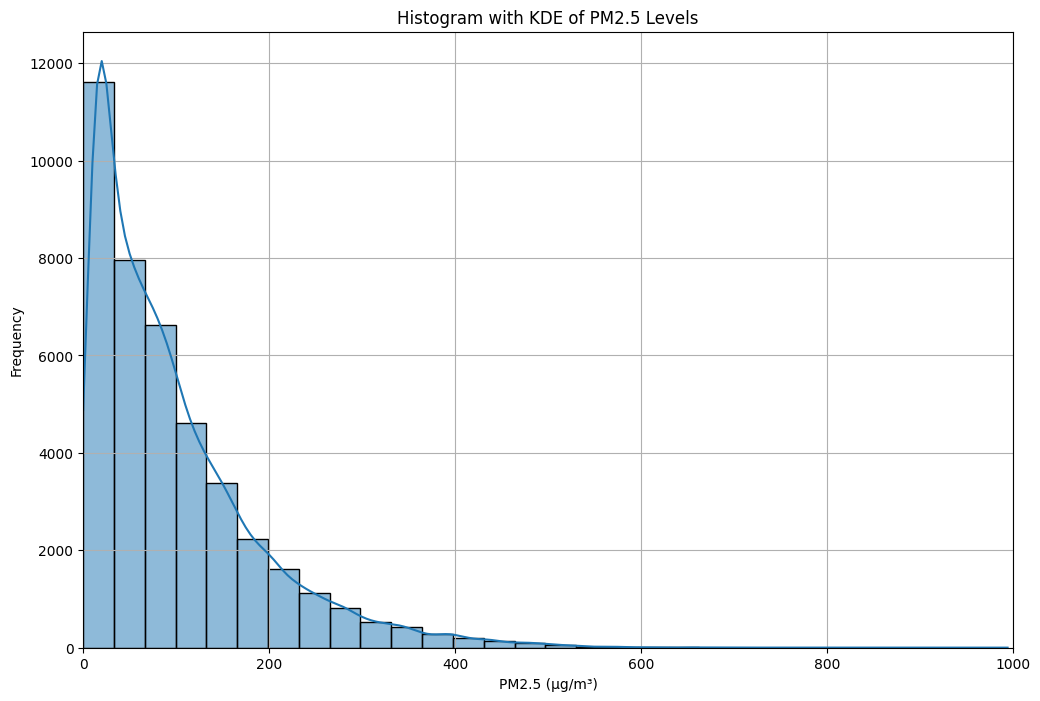

PM2.5 Range Percentage
0       0-200    83.224%
1     200-400    10.798%
2     400-600     1.189%
3     600-800     0.048%
4    800-1000     0.025%

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.histplot(data['PM2.5'], bins=30, kde=True)

# Define PM2.5 ranges and labels (no colors)
ranges = [(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000)]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']

# Store percentage data for the table
percentage_data = []

# Calculate percentages (no colored areas)
total_data = len(data['PM2.5'])
for i, (lower, upper) in enumerate(ranges):
    count = len(data[(data['PM2.5'] >= lower) & (data['PM2.5'] < upper)])
    percentage = (count / total_data) * 100
    percentage_data.append([labels[i], f'{percentage:.3f}%'])

# Plot enhancements (without color-coding)
plt.title("Histogram with KDE of PM2.5 Levels")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.grid(True)
plt.xlim(0, 1000)

# Display the histogram
plt.show()

# Create and display the percentage table
percentage_table = pd.DataFrame(percentage_data, columns=['PM2.5 Range', 'Percentage'])
display(percentage_table)

---
## 🔑 Key Insights

- PM2.5 values are highly **right-skewed**, with the majority (83.2%) below 200 µg/m³.
- Only 10.8% of the data falls in the 200–400 µg/m³ range, typically representing short-term pollution surges.
- 1.2% of the data exceeds 400 µg/m³, and values above 600 µg/m³ are **extremely rare** (~0%).
- This validates previous findings that extreme outliers are infrequent, and values >600 µg/m³ may warrant special treatment (e.g., winsorization, removal, or contextual verification).
- The skewed nature of the data may call for **scaling** or **log transformation** before model training.


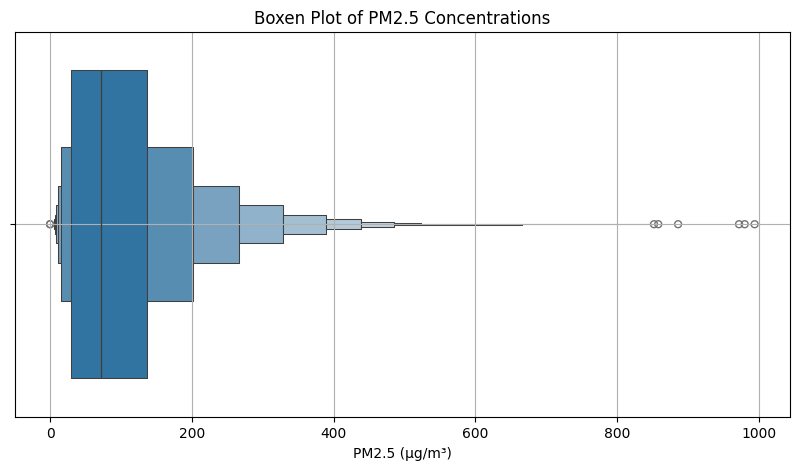

In [ ]:
# Boxen plot for PM2.5

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.boxenplot(x=data['PM2.5'])
plt.title("Boxen Plot of PM2.5 Concentrations")
plt.xlabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()


---
## 🔑 Key Insights
The boxen plot confirms that PM2.5 is highly skewed with a long right tail, indicating the presence of extreme values and possible outliers. These need to be considered during data cleaning and may affect model performance if left unaddressed.


---
## **PM2.5 Levels Over Time and Air Quality Index (AQI) Comparison: US, China and WHO Standards**
---

> **Note:** The AQI classifications in this project follow official air quality standards from:
> - **US EPA** (Environmental Protection Agency), which defines PM2.5 thresholds for AQI categories based on health impacts [EPA AQI Factsheet, 2012].
> - **Chinese HJ 633-2012**, issued by China's Ministry of Ecology and Environment, outlining PM2.5 breakpoints and pollution severity categories [HJ 633-2012 official regulation].
> - **World Health Organization (WHO)** guidelines, revised in 2021, which recommend a daily average PM2.5 limit of 15 µg/m³ and an annual average of 5 µg/m³, based solely on health risk evidence.

> These standards are referenced and explained in detail in the project file *Understanding and Interpreting PM2.5 Concentration Levels in Beijing* and official regulatory documents........ Refrence comes here ......


---
##**I. Annual PM2.5 Levels vs AQI Standards (2011–2015)**

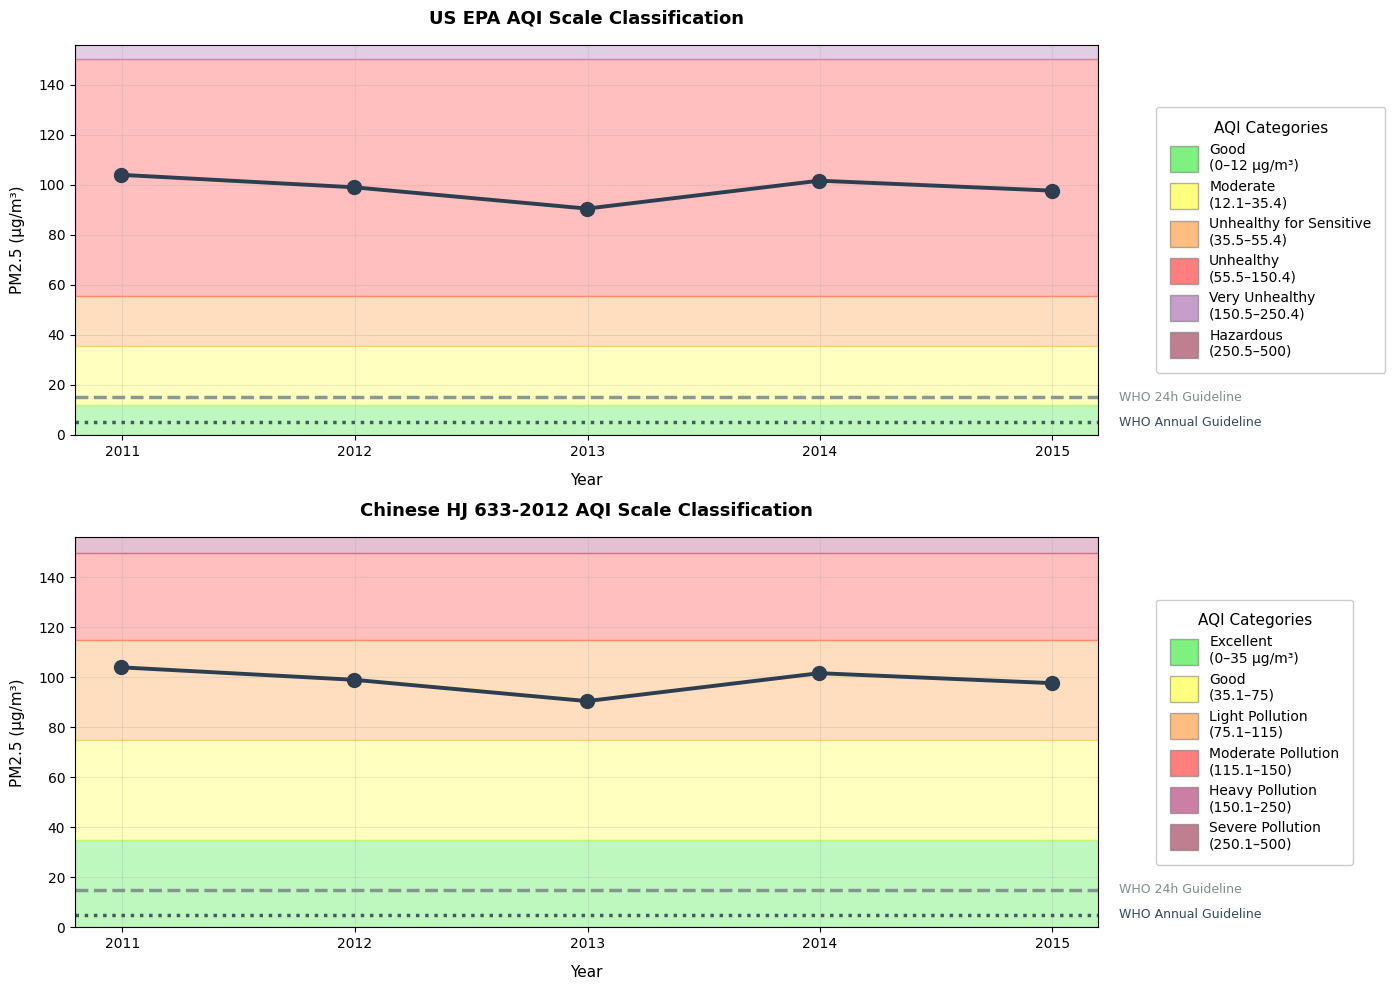

In [ ]:
# ===== DATA PREPARATION =====
# Assuming 'data' is your DataFrame with PM2.5 time series data
annual_avg = data['PM2.5'].resample('Y').mean()
who_annual = 5
who_daily = 15

# Create figure with adjusted proportions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Common parameters
y_max = min(annual_avg.max() * 1.5, 500)  # Extended to 500
line_args = {'marker':'o', 'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.8, 'markersize':10, 'zorder':5}

# ===== US EPA AQI =====
epa_breaks = [0, 12, 35.4, 55.4, 150.4, 250.4, 500]  # Added 500
epa_categories = [
    'Good\n(0–12 µg/m³)',
    'Moderate\n(12.1–35.4)',
    'Unhealthy for Sensitive\n(35.5–55.4)',
    'Unhealthy\n(55.5–150.4)',
    'Very Unhealthy\n(150.5–250.4)',
    'Hazardous\n(250.5–500)'
]
epa_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

# ===== Chinese HJ 633-2012 AQI =====
chn_breaks = [0, 35, 75, 115, 150, 250, 500]  # Added 500
chn_categories = [
    'Excellent\n(0–35 µg/m³)',
    'Good\n(35.1–75)',
    'Light Pollution\n(75.1–115)',
    'Moderate Pollution\n(115.1–150)',
    'Heavy Pollution\n(150.1–250)',
    'Severe Pollution\n(250.1–500)'
]
chn_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#99004c', '#7e0023']

# ===== PLOTTING FUNCTION =====
def create_aqi_plot(ax, breaks, colors, categories, title):
    # Enhanced background colors
    for i in range(len(breaks)-1):
        ax.axhspan(breaks[i], breaks[i+1], alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot data
    ax.plot(annual_avg.index, annual_avg.values, **line_args)

    # Add WHO guidelines
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.5, alpha=0.9)
    ax.annotate('WHO Annual Guideline',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=9, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.5, alpha=0.9)
    ax.annotate('WHO 24h Guideline',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=9, va='center')

    # Formatting
    ax.set_title(title, fontsize=13, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Force yearly ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Year', fontsize=11, labelpad=10)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=11, labelpad=10)

# ===== CREATE PLOTS =====
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'US EPA AQI Scale Classification')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Chinese HJ 633-2012 AQI Scale Classification')

# ===== ENHANCED LEGEND =====
def create_legend(ax, colors, categories):
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',  # Increased alpha
                    label=l) for c,l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.5),
                      fontsize=10,
                      title="AQI Categories",
                      title_fontsize=11,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.5)
    return legend

create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)

plt.tight_layout()
plt.show()

---
## 🔑 Key Insights

- PM2.5 annual averages consistently exceeded 90 µg/m³, peaking above 105 µg/m³.
- According to the **US EPA AQI**, these values are categorized as **Unhealthy** (55.5–150.4 µg/m³).
- The **Chinese HJ 633-2012 AQI** scale classifies them as **Light to Moderate Pollution**, showing a more lenient categorization.
- **WHO air quality guidelines** (5 µg/m³ annual, 15 µg/m³ daily) are far exceeded, with real-world values being ~10x higher.
- A noticeable drop in PM2.5 is seen in 2013, but the trend is not consistently improving over time.
- The comparison highlights how AQI interpretation can vary dramatically based on the adopted national standard.


---
##**II. Monthly PM2.5 Levels vs AQI Scales (US EPA & Chinese HJ 633-2012)**


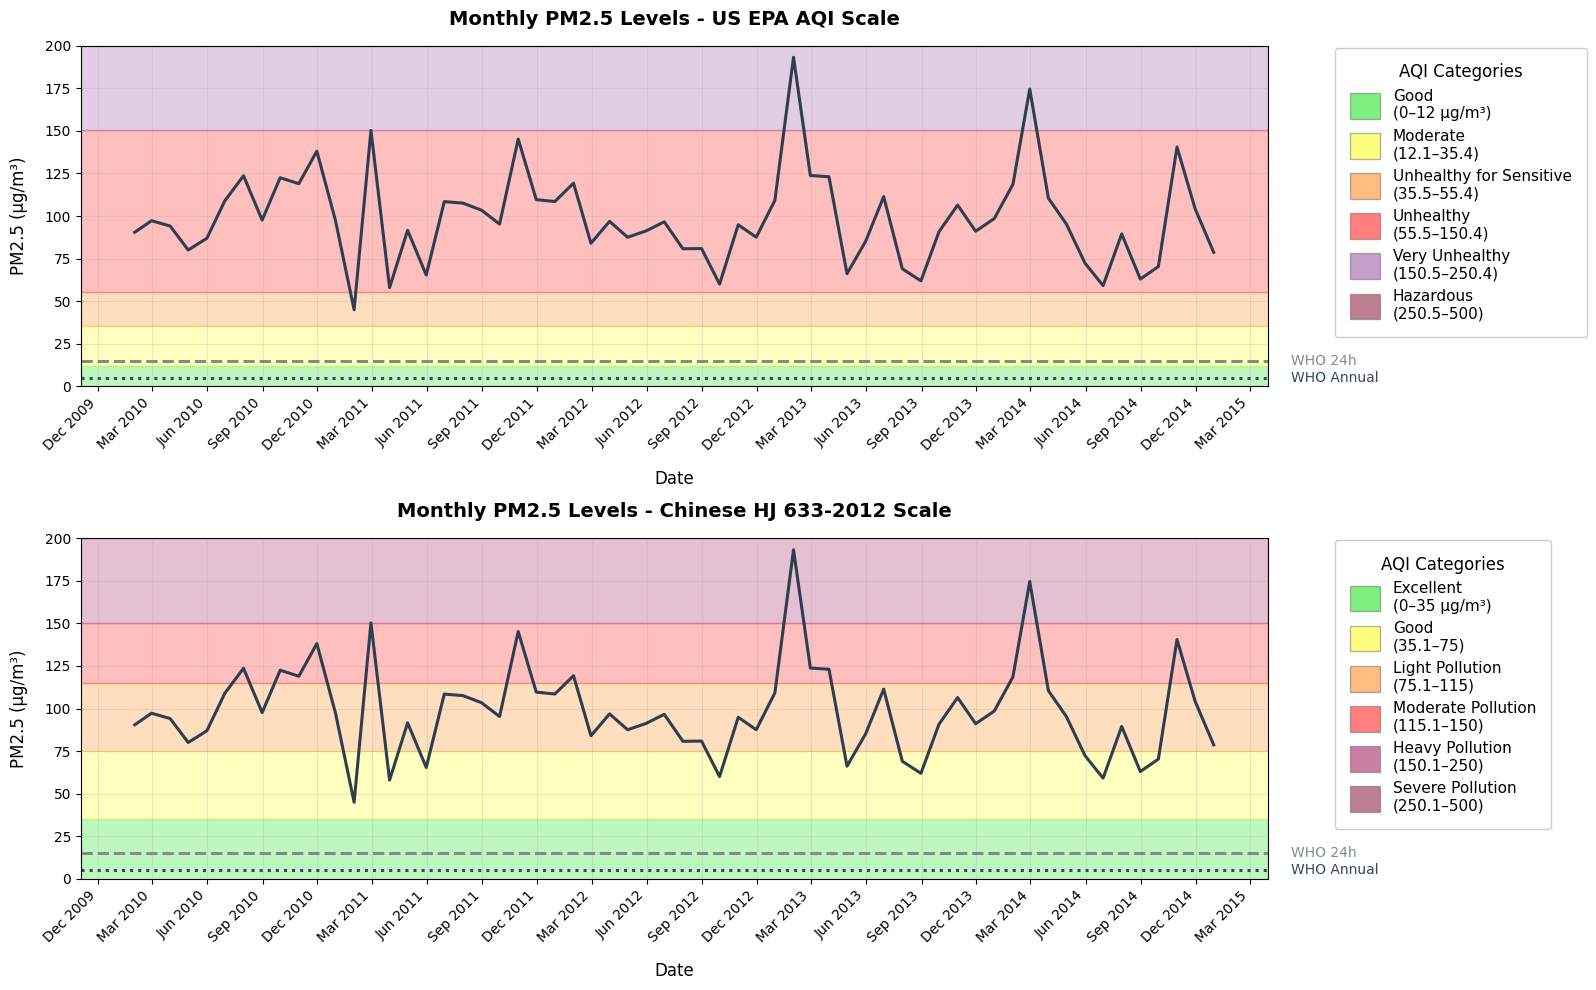

In [ ]:
# Data preparation
monthly_avg = data['PM2.5'].resample('M').mean()
who_annual = 5
who_daily = 15

# Create figure with adjusted proportions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Common parameters with fixed y-axis
y_max = 200
line_args = {'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.2, 'zorder':5}

# ===== US EPA AQI =====
epa_breaks = [0, 12, 35.4, 55.4, 150.4, 250.4, 500]  # Extended to 500
epa_categories = [
    'Good\n(0–12 µg/m³)',
    'Moderate\n(12.1–35.4)',
    'Unhealthy for Sensitive\n(35.5–55.4)',
    'Unhealthy\n(55.5–150.4)',
    'Very Unhealthy\n(150.5–250.4)',
    'Hazardous\n(250.5–500)'
]
epa_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

# ===== Chinese HJ 633-2012 AQI =====
chn_breaks = [0, 35, 75, 115, 150, 250, 500]  # Extended to 500
chn_categories = [
    'Excellent\n(0–35 µg/m³)',
    'Good\n(35.1–75)',
    'Light Pollution\n(75.1–115)',
    'Moderate Pollution\n(115.1–150)',
    'Heavy Pollution\n(150.1–250)',
    'Severe Pollution\n(250.1–500)'
]
chn_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#99004c', '#7e0023']

def create_aqi_plot(ax, breaks, colors, categories, title):
    # Plot background up to y_max (200) but retain full break definitions
    for i in range(len(breaks)-1):
        lower = breaks[i]
        upper = breaks[i+1]
        if lower >= y_max:
            continue  # Skip breaks above the plot's y_max
        # Clip upper bound to y_max
        effective_upper = min(upper, y_max)
        ax.axhspan(lower, effective_upper, alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot monthly data
    ax.plot(monthly_avg.index, monthly_avg.values, **line_args)

    # Add WHO guidelines
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.2)
    ax.annotate('WHO Annual',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=10, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.2)
    ax.annotate('WHO 24h',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=10, va='center')

    # Formatting
    ax.set_title(title, fontsize=14, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # More frequent ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Date', fontsize=12, labelpad=12)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=12, labelpad=12)

# Create plots
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'Monthly PM2.5 Levels - US EPA AQI Scale')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Monthly PM2.5 Levels - Chinese HJ 633-2012 Scale')

# Enhanced legend
def create_legend(ax, colors, categories):
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',
                    label=l) for c, l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.57),  # Adjust the y-coordinate here
                      fontsize=11,
                      title="AQI Categories",
                      title_fontsize=12,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.2)
    return legend

# Add legends
create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)

plt.tight_layout()
plt.show()

---
## 🔑 Key Insights

- PM2.5 shows clear **seasonal peaks**, especially during winter months (e.g., early 2013, early 2014), likely due to heating-related emissions and atmospheric stagnation.
- Under the **US EPA AQI**, several months fall into the **“Very Unhealthy”** category, breaching 150 µg/m³.
- The **Chinese AQI scale** assigns the same values to **“Heavy Pollution”**, reflecting more lenient thresholds.
- Even in the cleanest months, levels consistently **exceed WHO limits** for both daily (15 µg/m³) and annual exposure (5 µg/m³).
- These plots emphasize both the **severity and persistence of PM2.5 pollution**, and how **standards shape interpretation** of air quality data.


---
##**III. Weekly PM2.5 Levels – US EPA vs Chinese AQI Classification**


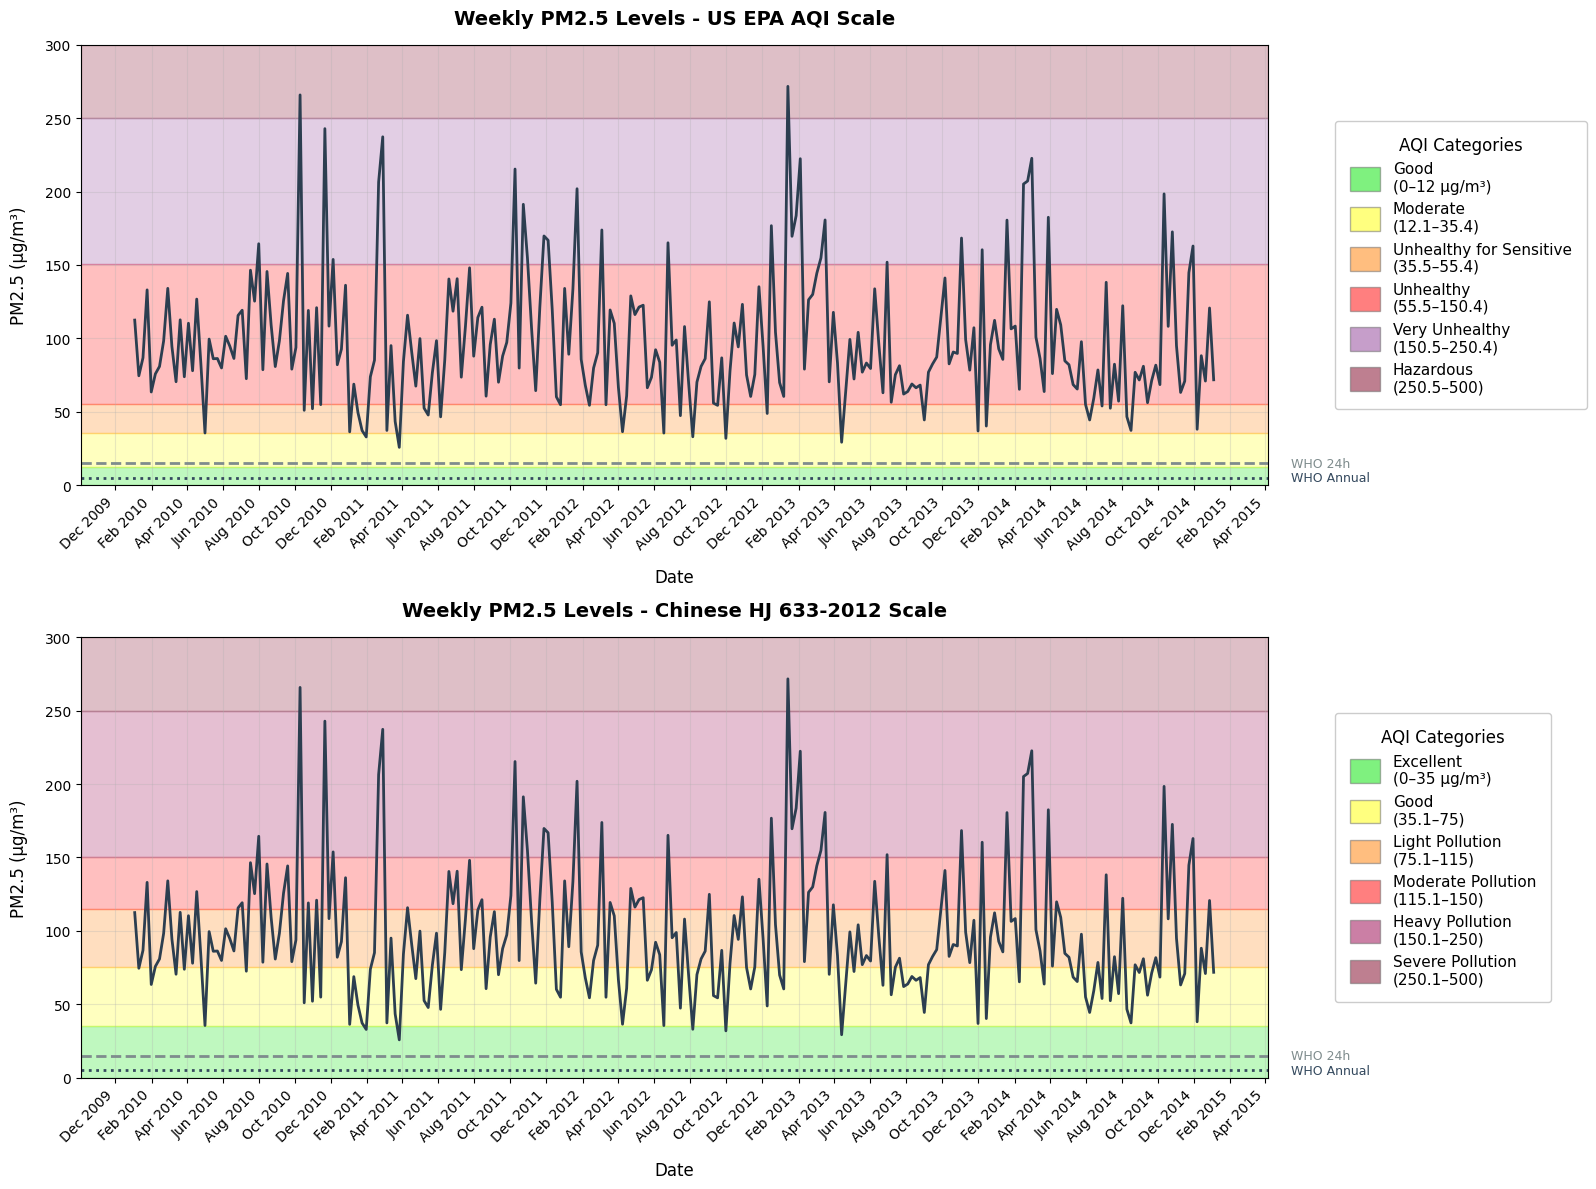

In [ ]:
# ===== DATA PREPARATION =====
weekly_avg = data['PM2.5'].resample('W').mean()  # Weekly resampling
who_annual = 5
who_daily = 15

# Create figure with adjusted proportions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Common parameters
y_max = 300
line_args = {'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.0, 'zorder':5}

# ===== US EPA AQI =====
epa_breaks = [0, 12, 35.4, 55.4, 150.4, 250.4, 500]
epa_categories = [
    'Good\n(0–12 µg/m³)',
    'Moderate\n(12.1–35.4)',
    'Unhealthy for Sensitive\n(35.5–55.4)',
    'Unhealthy\n(55.5–150.4)',
    'Very Unhealthy\n(150.5–250.4)',
    'Hazardous\n(250.5–500)'
]
epa_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

# ===== Chinese HJ 633-2012 AQI =====
chn_breaks = [0, 35, 75, 115, 150, 250, 500]
chn_categories = [
    'Excellent\n(0–35 µg/m³)',
    'Good\n(35.1–75)',
    'Light Pollution\n(75.1–115)',
    'Moderate Pollution\n(115.1–150)',
    'Heavy Pollution\n(150.1–250)',
    'Severe Pollution\n(250.1–500)'
]
chn_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#99004c', '#7e0023']

def create_aqi_plot(ax, breaks, colors, categories, title):
    # Background colors (clipped at y_max)
    for i in range(len(breaks)-1):
        lower = breaks[i]
        upper = breaks[i+1]
        if lower >= y_max:
            continue
        effective_upper = min(upper, y_max)
        ax.axhspan(lower, effective_upper, alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot weekly data
    ax.plot(weekly_avg.index, weekly_avg.values, **line_args)

    # Add WHO guidelines
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.0)
    ax.annotate('WHO Annual',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=9, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.0)
    ax.annotate('WHO 24h',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=9, va='center')

    # Formatting
    ax.set_title(title, fontsize=14, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.grid(True, alpha=0.3)

    # Date formatting for weekly data
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Tick every 2 months
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Date', fontsize=12, labelpad=12)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=12, labelpad=12)

# Create plots
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'Weekly PM2.5 Levels - US EPA AQI Scale')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Weekly PM2.5 Levels - Chinese HJ 633-2012 Scale')

# Legend function (same as monthly)
def create_legend(ax, colors, categories):
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',
                    label=l) for c, l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.5),
                      fontsize=11,
                      title="AQI Categories",
                      title_fontsize=12,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.0)
    return legend

create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)

plt.tight_layout()
plt.show()

---
## 🔑 Key Insights

- Weekly data reveals **extreme volatility** in PM2.5, with frequent short-term pollution spikes.
- Under the **US EPA AQI**, many weeks are classified as **“Very Unhealthy” or even “Hazardous”**, signaling serious health risks.
- The **Chinese AQI scale** tends to classify the same levels more leniently (e.g., “Heavy” or “Moderate” pollution), which may downplay urgency.
- WHO 24h and annual guidelines are **consistently violated**, underscoring the intensity and regularity of air quality issues.
- This view confirms that high pollution is not only **seasonal** but also **episodic**, with **critical implications for respiratory health and emergency planning**.


---

#**1.3    SEASONALITIES IN THE DATA**
---

*To explore how pollution and meteorological variables behave over time, we analyze **hourly, weekly, and monthly** patterns. This helps us identify cyclical behaviors, which can guide feature engineering for better model performance.*

---


## **I. Hourly Seasonality: PM2.5 and Weather Variables**

We compute the average **hourly trends** for the following variables, including confidence intervals:

- **PM2.5 Concentration**
- **Temperature (°C)**
- **Dew Point (°C)**
- **Wind Speed (m/s)**

This helps reveal short-term cyclical patterns over a typical day.


In [ ]:
def seasonal_mean(data, season_var, con_var):
    """
    Generates the mean of the seasonal period of choice, plus the upper and lower Confidence Intervals

    data: DataFrame containing the data
    season_var: Seasonal categorical variable - day/hour/month
    con_var: Continuous variable providing the "mean" reading of interest
    """

    mean_dict = dict(data.groupby(season_var)[con_var].mean())

    n = data.groupby(season_var)[con_var].count().mean()

    upper_dict = dict(data.groupby(season_var)[con_var].mean() +
                      1.96 * (data.groupby(season_var)[con_var].std() / ((n - 1) ** 0.5)))

    lower_dict = dict(data.groupby(season_var)[con_var].mean() -
                      1.96 * (data.groupby(season_var)[con_var].std() / ((n - 1) ** 0.5)))

    mean_data = pd.DataFrame([mean_dict, upper_dict, lower_dict]).transpose()
    mean_data.columns = ['mean', 'upper_CI', 'lower_CI']

    return mean_data

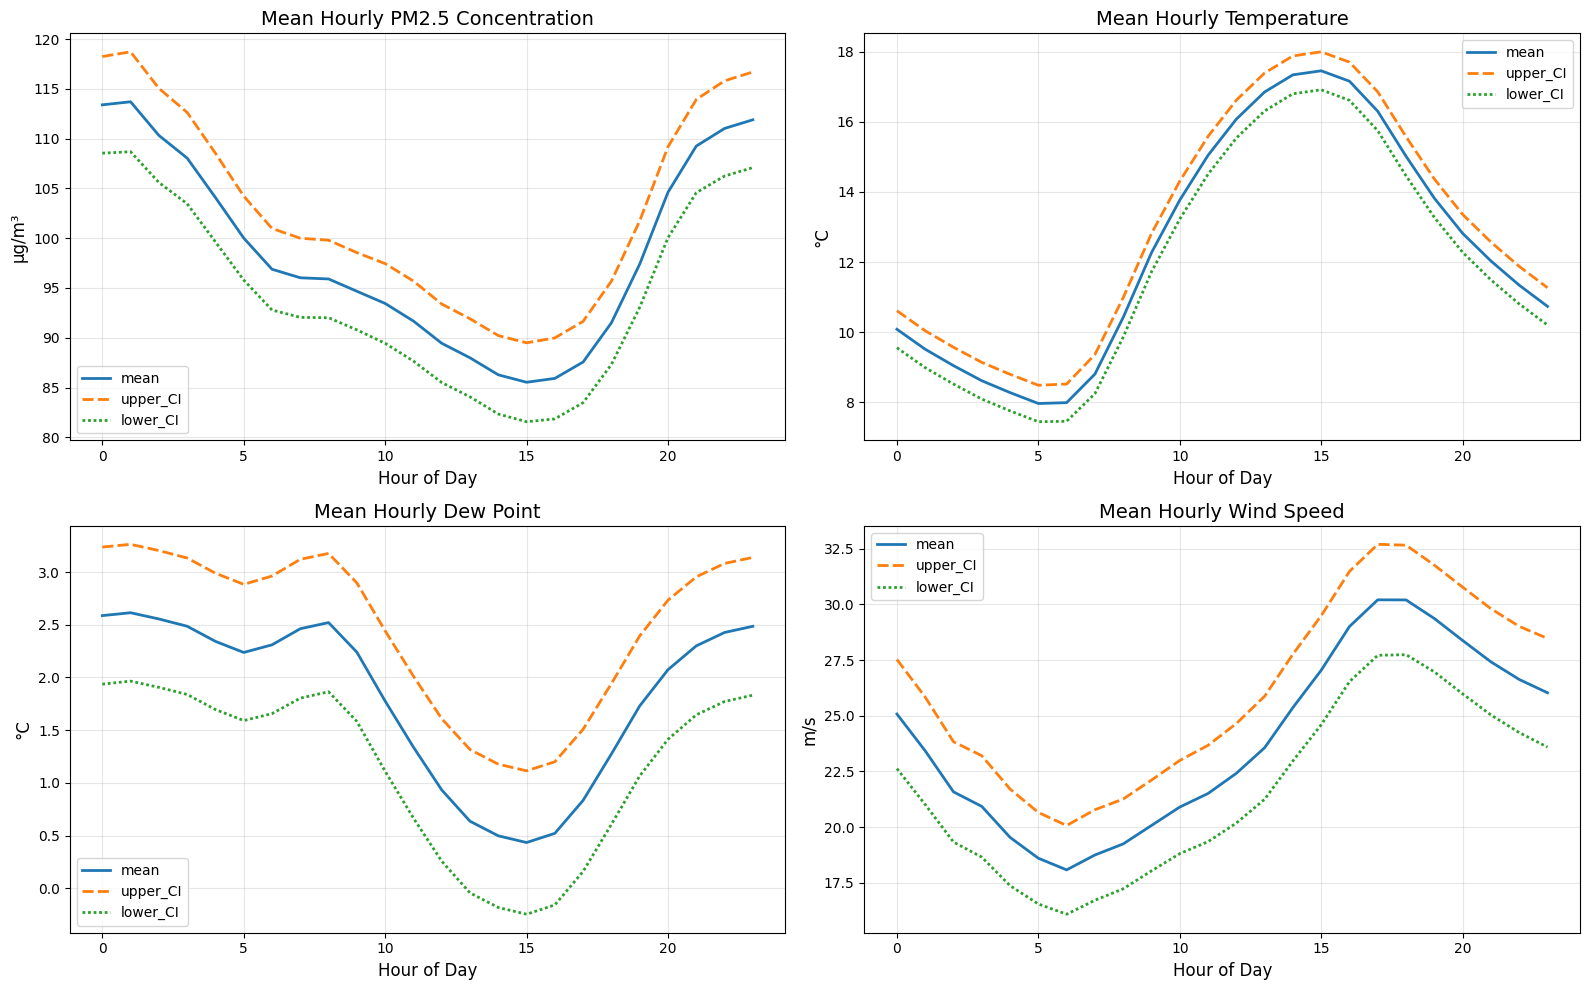

In [ ]:

def plot_hourly_avg(data, variable, title, ylabel, ax):
    """Plots hourly averages with confidence intervals on a specific subplot."""
    hourly_avg = seasonal_mean(data, 'Hour', variable)

    sns.lineplot(data=hourly_avg, linewidth=2, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.3)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot for PM2.5, Temperature, Dew Point, and Wind Speed on subplots
plot_hourly_avg(data, 'PM2.5', 'Mean Hourly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_hourly_avg(data, 'Temp', 'Mean Hourly Temperature', '°C', axes[0, 1])
plot_hourly_avg(data, 'DewP', 'Mean Hourly Dew Point', '°C', axes[1, 0])
plot_hourly_avg(data, 'WindSpeed', 'Mean Hourly Wind Speed', 'm/s', axes[1, 1])

plt.tight_layout()
plt.show()

---
## 🔑 Key Insights

- **PM2.5** follows a U-shaped curve, with peaks during night and evening hours, and a trough around midday — likely reflecting human activity and atmospheric dispersion.
- **Temperature** shows expected daytime peaks and nighttime drops.
- **Dew Point** and **Wind Speed** also show strong daily variability, with wind speed highest in the afternoon.

> Hourly fluctuations suggest **time of day** could be a useful feature, especially for short-term pollution prediction.


---
## **II. Weekly Seasonality: PM2.5 and Weather Variables**

Similiar analysis to the previous section but now for **weekly cycles**.




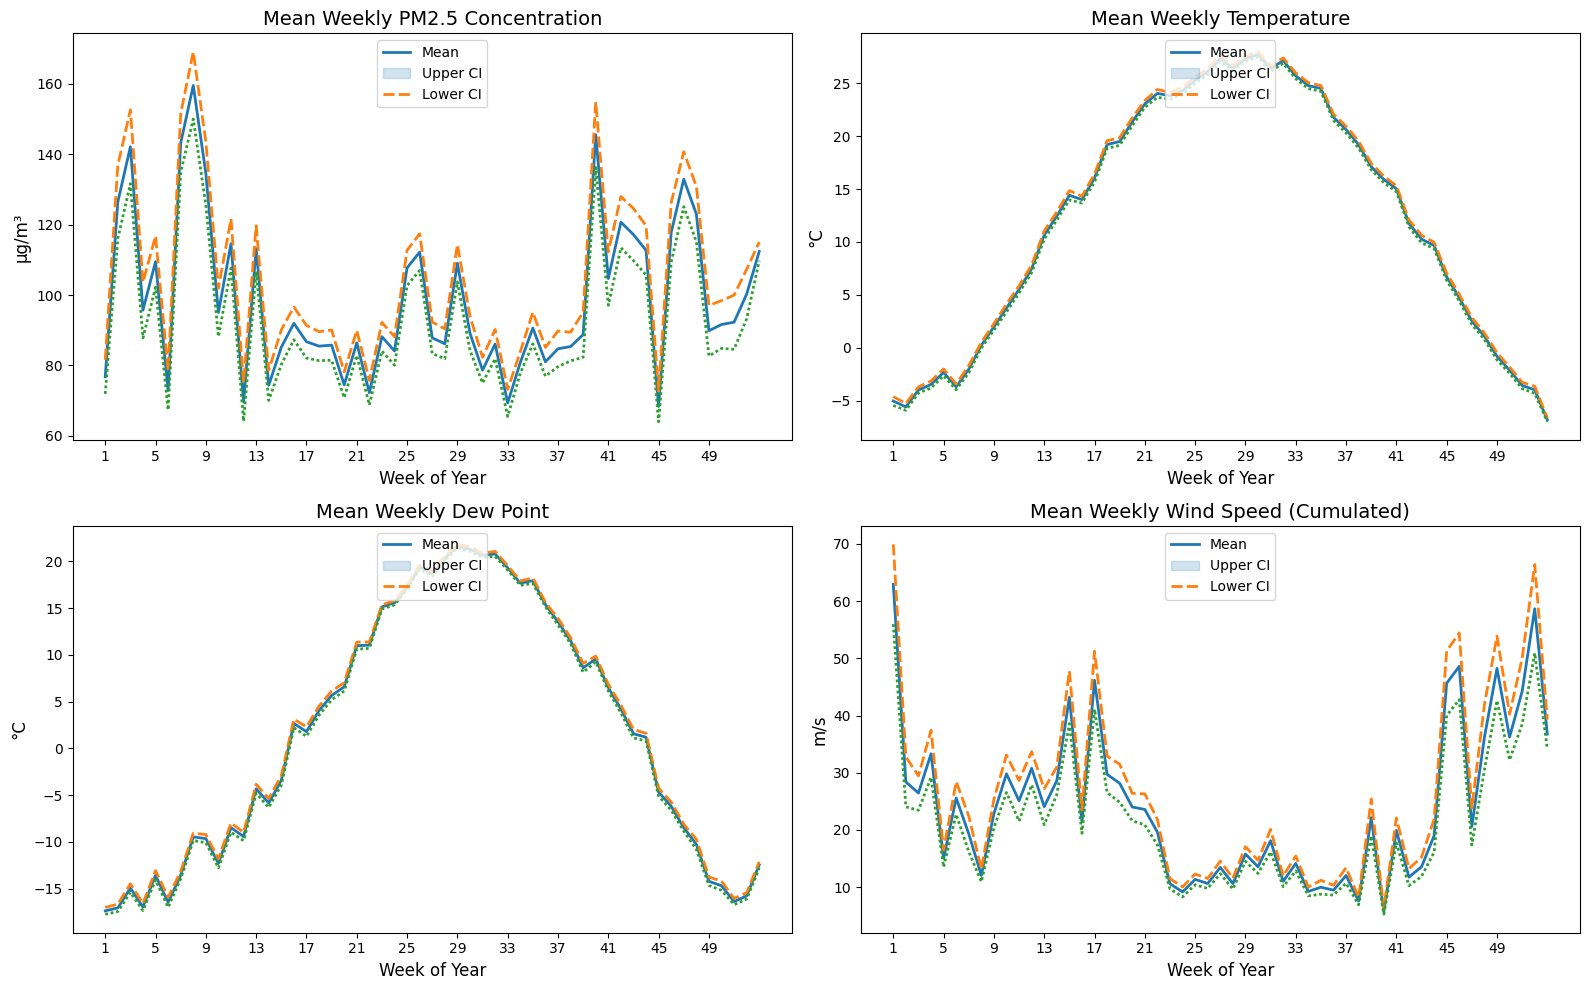

In [ ]:
# Calculate weekly averages for all variables
weekly_avg_PM25 = seasonal_mean(data, data.index.isocalendar().week, 'PM2.5')
weekly_avg_temp = seasonal_mean(data, data.index.isocalendar().week, 'Temp')
weekly_avg_dewp = seasonal_mean(data, data.index.isocalendar().week, 'DewP')
weekly_avg_iws = seasonal_mean(data, data.index.isocalendar().week, 'WindSpeed')

# Create a figure and a grid of subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Function to plot weekly data on a specific subplot
def plot_weekly_avg(data, variable, title, ylabel, ax):
    sns.lineplot(data=data, linewidth=2, ax=ax)
    ax.legend(loc='upper center', fontsize=10, labels=['Mean', 'Upper CI', 'Lower CI'])
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Week of Year', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks(range(1, 53, 4))  # Set ticks for every 4 weeks

# Plot data on each subplot
plot_weekly_avg(weekly_avg_PM25, 'PM2.5', 'Mean Weekly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_weekly_avg(weekly_avg_temp, 'Temp', 'Mean Weekly Temperature', '°C', axes[0, 1])
plot_weekly_avg(weekly_avg_dewp, 'DewP', 'Mean Weekly Dew Point', '°C', axes[1, 0])
plot_weekly_avg(weekly_avg_iws, 'WindSpeed', 'Mean Weekly Wind Speed (Cumulated)', 'm/s', axes[1, 1])

# Adjust spacing and display
plt.tight_layout()
plt.show()

---

## 🔑 Key Insights:
- **PM2.5** levels are consistently elevated during winter weeks (approx. weeks 1–13 and 45–52), likely due to heating and poor dispersion.
- **Temperature and Dew Point** follow expected seasonal transitions, peaking mid-year.
- **Wind Speed** shows sharp weekly fluctuations with secondary peaks toward the year’s end.
- Weekly aggregation offers a **practical granularity** for incorporating seasonal shifts into modeling workflows.

---
## **III. Monthly Seasonality: PM2.5 and Weather Variables**

Similar anaylsis as the previous section but now for **monthly averages**.



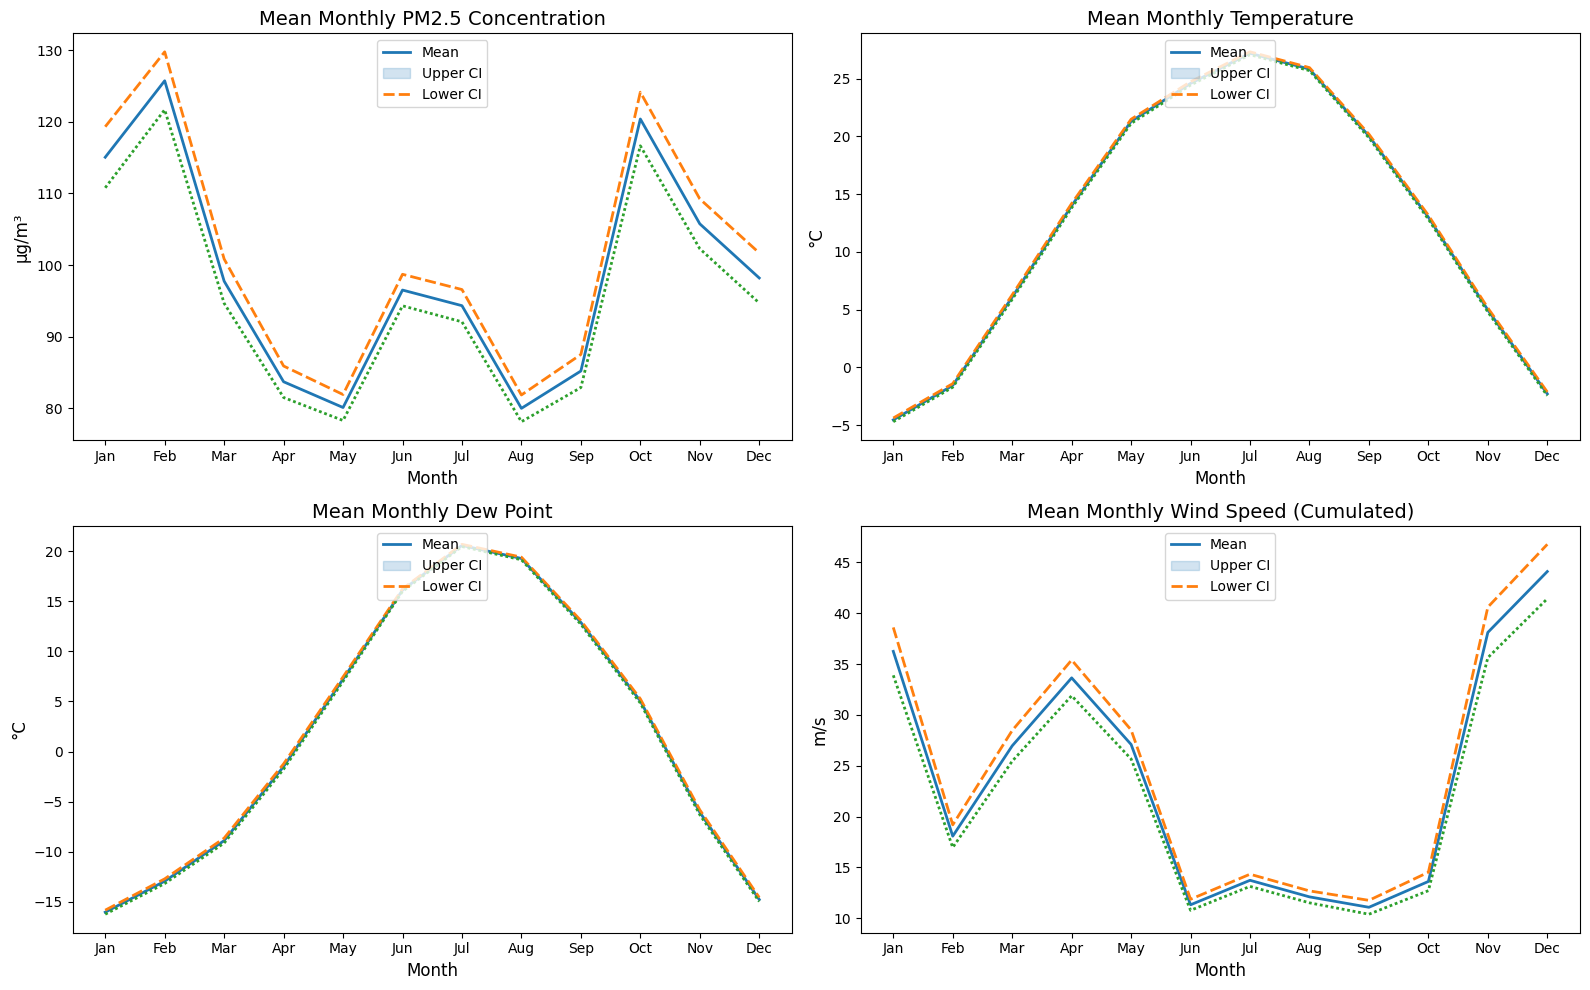

In [ ]:
# Calculate monthly averages for all variables
Month_avg_PM25 = seasonal_mean(data, 'Month', 'PM2.5')
Month_avg_temp = seasonal_mean(data, 'Month', 'Temp')
Month_avg_dewp = seasonal_mean(data, 'Month', 'DewP')
Month_avg_iws = seasonal_mean(data, 'Month', 'WindSpeed')

# Create a figure and a grid of subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Function to plot monthly data on a specific subplot
def plot_monthly_avg(data, variable, title, ylabel, ax):
    sns.lineplot(data=data, linewidth=2, ax=ax)
    ax.legend(loc='upper center', fontsize=10, labels=['Mean', 'Upper CI', 'Lower CI'])  # Smaller legend
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot data on each subplot
plot_monthly_avg(Month_avg_PM25, 'PM2.5', 'Mean Monthly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_monthly_avg(Month_avg_temp, 'Temp', 'Mean Monthly Temperature', '°C', axes[0, 1])
plot_monthly_avg(Month_avg_dewp, 'DewP', 'Mean Monthly Dew Point', '°C', axes[1, 0])
plot_monthly_avg(Month_avg_iws, 'WindSpeed', 'Mean Monthly Wind Speed (Cumulated)', 'm/s', axes[1, 1])

# Adjust spacing and display
plt.tight_layout()
plt.show()

---
## 🔑 Key Insights:
- **PM2.5** exhibits distinct winter peaks (Dec–Feb) and summer lows — in line with heating use and weather conditions.
- **Temperature and Dew Point** follow a smooth seasonal curve, peaking around July–August.
- **Wind Speed** has intermittent bursts, especially in spring and late autumn.
- These long-term cycles highlight **seasonal regularities** that can inform time-based feature engineering.

---
#**1.4    HANDLING MISSING VALUES in PM2.5**
---


Accurate imputation of missing data is critical for producing reliable models. In this section, we assess the temporal distribution of missing values in PM2.5, followed by a careful two-step imputation strategy:

- **Exploration**: Identify missing data patterns, especially before 2012.
- **Interpolation**: Within-day linear interpolation (morning and evening segments).
- **Imputation**: Median filling per hour, per month, per year for remaining missing values.
- **Validation**: Visual and statistical comparison of original and imputed distributions.

---

## **I. Exploring Missing PM2.5 Data**

We begin by visualizing the percentage of missing PM2.5 values per month from 2010–2015. A major portion of the missing data occurs prior to 2012, as revealed in both line and bar plots.

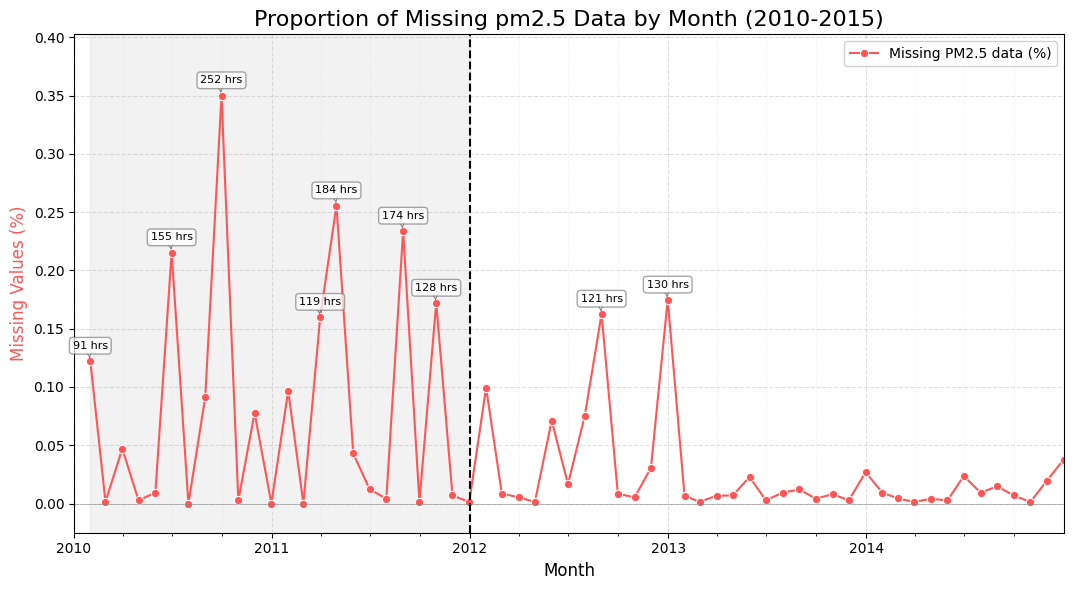

In [ ]:
# MISSING VALUES PER MONTH PLOT

# Missing data statistics
missing_by_month = data['PM2.5'].isnull().resample('ME').mean()
missing_hours_by_month = data['PM2.5'].isnull().resample('ME').sum() # Changed 'pm2.5' to 'PM2.5'

# Create the plot
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(x=missing_by_month.index, y=missing_by_month.values,
            marker='o', markersize=6, color='#FF5555', linewidth=1.5,
            ax=ax, label="Missing %")

# Styling and Annotations
ax.set_title('Proportion of Missing pm2.5 Data by Month (2010-2015)', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Missing Values (%)', fontsize=12, color='#FF5555')

max_value = missing_by_month.max()
ax.set_ylim(bottom=-0.025, top=max_value * 1.15)

cutoff_date = pd.to_datetime("2012-01-01")
ax.axvline(cutoff_date, color='black', linestyle='--', linewidth=1.5)
ax.axvspan(missing_by_month.index.min(), cutoff_date, alpha=0.1, color='gray')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.7, linewidth=0.5)

for date, pct, hrs in zip(missing_by_month.index, missing_by_month, missing_hours_by_month):
    if pct > 0.1:
        ax.annotate(
            text=f"{int(hrs)} hrs",
            xy=(date, pct),
            xytext=(date, pct + max_value * 0.03),
            ha='center',
            fontsize=8,
            arrowprops=dict(
                arrowstyle="->",
                color='gray',
                lw=0.7,
                connectionstyle="arc3,rad=0.1"
            ),
            bbox=dict(
                boxstyle="round,pad=0.3",
                fc="white",
                ec="gray",
                alpha=0.7
            )
        )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

# Ensure x-axis limits don't cut off data
start_date = data.index.min()
end_date = data.index.max()
ax.set_xlim(start_date, end_date)

ax.xaxis.set_minor_locator(mdates.MonthLocator([1, 4, 7, 10]))

plt.grid(True, which='major', linestyle='--', alpha=0.4)
plt.grid(True, which='minor', linestyle=':', alpha=0.2)

legend = ax.legend(
    ['Missing PM2.5 data (%)'],
    loc='upper right',
    framealpha=0.9,
    fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.98)

plt.show()

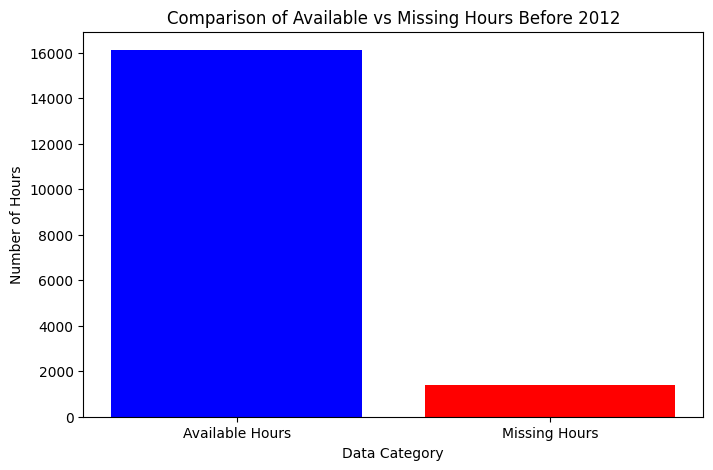

Total hours before 2012: 17520
Missing PM2.5 hours before 2012: 1397
Percentage of missing data: 7.97%


In [ ]:
# Filter data for before 2012
df_before_2012 = data[data['Year'] < 2012]

# Calculate total expected hours before 2012
total_hours_before_2012 = df_before_2012.shape[0]

# Calculate missing hours before 2012 in PM2.5
missing_hours_before_2012 = df_before_2012['PM2.5'].isnull().sum()

# Calculate percentage of missing hours
missing_percentage_before_2012 = (missing_hours_before_2012 / total_hours_before_2012) * 100

# Missing vs Available Hours Before 2012
plt.figure(figsize=(8, 5))
plt.bar(['Available Hours', 'Missing Hours'],
        [total_hours_before_2012 - missing_hours_before_2012, missing_hours_before_2012],
        color=['blue', 'red'])
plt.xlabel('Data Category')
plt.ylabel('Number of Hours')
plt.title('Comparison of Available vs Missing Hours Before 2012')
plt.show()


# Print results
print(f"Total hours before 2012: {total_hours_before_2012}")
print(f"Missing PM2.5 hours before 2012: {missing_hours_before_2012}")
print(f"Percentage of missing data: {missing_percentage_before_2012:.2f}%")

---

## 🔑 Key Insights:

- Significant data gaps exist **before 2012**, with over **1300 missing hours**, amounting to nearly **8% of all hours** in that period.
- After 2012, missing values are rare and well-distributed.
- A major cluster of missing data is found at the **very start of 2010**, likely due to sensor initialization issues.
- Despite the early gaps, the **volume of valid data before 2012** remained substantial.
- **This informed our decision to retain the pre-2012 data and develop a tailored interpolation strategy to preserve valuable information.**



---

##**II. Interpolation Strategy (Morning & Evening)**

---

After reviewing the distribution of missing data, we chose to **retain the full dataset**, including the pre-2012 period with higher missing rates. To recover these gaps meaningfully, we applied a **multi-step imputation strategy** balancing temporal structure and data availability:

- **Drop fully-missing segments** (e.g., the first 24 hours of 2010).
- **Interpolate missing values within each day**, separately for morning and evening periods.
- **Fallback to median imputation per month/hour/year** where interpolation wasn’t possible.
- **Preserve the original values** and construct a unified `PM2.5_filled` variable for downstream modeling.

These steps aim to maximize data coverage while respecting diurnal and seasonal patterns in PM2.5 levels.

---

## **Dropping Fully Missing Day (January 1st, 2010)**


In [ ]:
# The very first day of the sample is missing the target variable
data.loc[(data.index.month==1) & (data.index.year==2010)].isnull().sum()

Year            0
Month           0
Day             0
Hour            0
DewP            0
Temp            0
Press           0
WinDir          0
WindSpeed       0
HoursOfSnow     0
HoursOfRain     0
PM2.5          91
dtype: int64

In [ ]:
# Dropped the first 24 rows (January 1, 2010, which is fully NaN)
data = data.iloc[24:]

The first day of the dataset (January 1, 2010) contains **no valid observations** for the PM2.5 variable. Since this block provides no usable information, we dropped it entirely to clean the dataset before interpolation.


---
##**Interpolation Within Each Day (Morning and Evening Split)**

To capture diurnal variability and avoid across-day interpolation distortion, PM2.5 data is interpolated within:
- Morning hours: 00:00–14:00
- Evening hours: 15:00–23:00  
This preserves intraday structure and avoids misleading interpolated trends.


In [ ]:
# Split into morning and evening time blocks
data_down = data.between_time("00:00", "14:00")
data_up = data.between_time("15:00", "23:00")

# Interpolate missing PM2.5 within each day, only inside the bounds
data_down['PM2.5_updown'] = data_down.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside'))

data_up['PM2.5_updown'] = data_up.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside'))

# Merge morning and evening datasets back into one full dataset
data = pd.concat([data_down, data_up])
data.sort_index(inplace=True)


###Create One Column with Day-Level Interpolation as Primary Data
# Use interpolated values where available, fall back to original otherwise
data['PM2.5_daily_interpol'] = data['PM2.5_updown'].combine_first(data['PM2.5'])

In [ ]:
# Check the null data
data.isnull().sum()

Year                       0
Month                      0
Day                        0
Hour                       0
DewP                       0
Temp                       0
Press                      0
WinDir                     0
WindSpeed                  0
HoursOfSnow                0
HoursOfRain                0
PM2.5                   2043
PM2.5_updown            1821
PM2.5_daily_interpol    1821
dtype: int64


---
##**Final Imputation: Median by Year-Month-Hour**

For any remaining missing values after interpolation, we perform **median imputation** grouped by:
- **Year**
- **Month**
- **Hour**

This preserves seasonal and temporal patterns specific to each year.


In [ ]:
data['PM2.5_imp_10'] = data[data.index.year==2010].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_11'] = data[data.index.year==2011].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_12'] = data[data.index.year==2012].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_13'] = data[data.index.year==2013].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_14'] = data[data.index.year==2014].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

---

##**Finalizing Imputation & Cleaning Temporary Columns**

After applying both **interpolation** (day-level) and **groupwise median imputation** (year/month/hour), we created a single unified column:  
`PM2.5_filled`, which merges all valid estimates while preserving the original values where available.

- This column serves as the final, fully populated target variable for modeling and analysis.
- All intermediate columns used for the imputation process (`PM2.5_daily_interp`, `PM2.5_updown`, yearly imputation columns, etc.) were dropped to simplify the dataset.

We confirmed there are **no remaining missing values** in the cleaned dataset.


In [ ]:
data['PM2.5_filled'] = (
    data['PM2.5_imp_10']
    .combine_first(data['PM2.5_imp_11'])
    .combine_first(data['PM2.5_imp_12'])
    .combine_first(data['PM2.5_imp_13'])
    .combine_first(data['PM2.5_imp_14'])
)

In [ ]:
# Check the null data
data.isnull().sum()

Year                        0
Month                       0
Day                         0
Hour                        0
DewP                        0
Temp                        0
Press                       0
WinDir                      0
WindSpeed                   0
HoursOfSnow                 0
HoursOfRain                 0
PM2.5                    2043
PM2.5_updown             1821
PM2.5_daily_interpol     1821
PM2.5_imp_10            35064
PM2.5_imp_11            35040
PM2.5_imp_12            35016
PM2.5_imp_13            35040
PM2.5_imp_14            35040
PM2.5_filled                0
dtype: int64

In [ ]:
# Define columns to drop (all the intermediate imputation columns)
cols_to_drop = [col for col in data.columns if 'PM2.5_imp_' in col or 'PM2.5_daily_' in col or 'PM2.5_updown' in col]

# Drop them from the dataset
data.drop(columns=cols_to_drop, inplace=True)

# Optional: double-check the remaining columns
print(data.columns)


Index(['Year', 'Month', 'Day', 'Hour', 'DewP', 'Temp', 'Press', 'WinDir',
       'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'PM2.5', 'PM2.5_filled'],
      dtype='object')


---

##**Validation: Imputed vs. Original Data**

We validate the imputed data using:

- **Distribution comparisons** (full dataset + zoom in on 2010 subset)
- **Violin plots by year** + **Descriptive statistics** (mean, median, IQR)




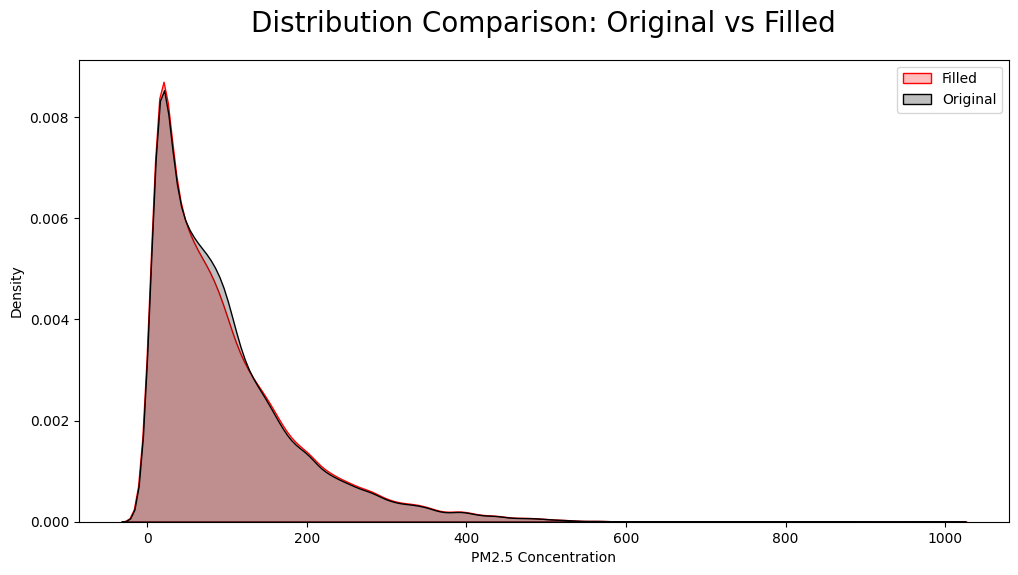

In [ ]:
# Comparison for Year
plt.figure(figsize=(12,6))
sns.kdeplot(data['PM2.5'], color='red', label='Filled', fill=True)
sns.kdeplot(data['PM2.5_filled'], color='black', label='Original', fill=True)
plt.title('Distribution Comparison: Original vs Filled', fontsize=20, pad=20)
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Density')
plt.legend()
plt.show()

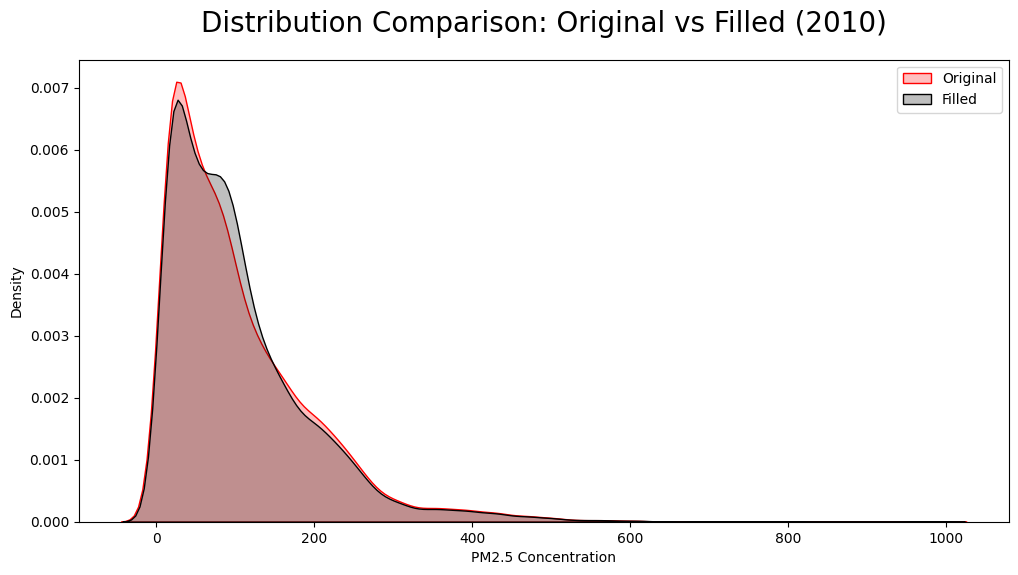

In [ ]:
# Filter data for 2010
data_2010 = data[data.index.year == 2010]

# Comparison for Year 2010
plt.figure(figsize=(12, 6))
sns.kdeplot(data_2010['PM2.5'], color='red', label='Original', fill=True)
sns.kdeplot(data_2010['PM2.5_filled'], color='black', label='Filled', fill=True)
plt.title('Distribution Comparison: Original vs Filled (2010)', fontsize=20, pad=20)
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Density')
plt.legend()
plt.show()

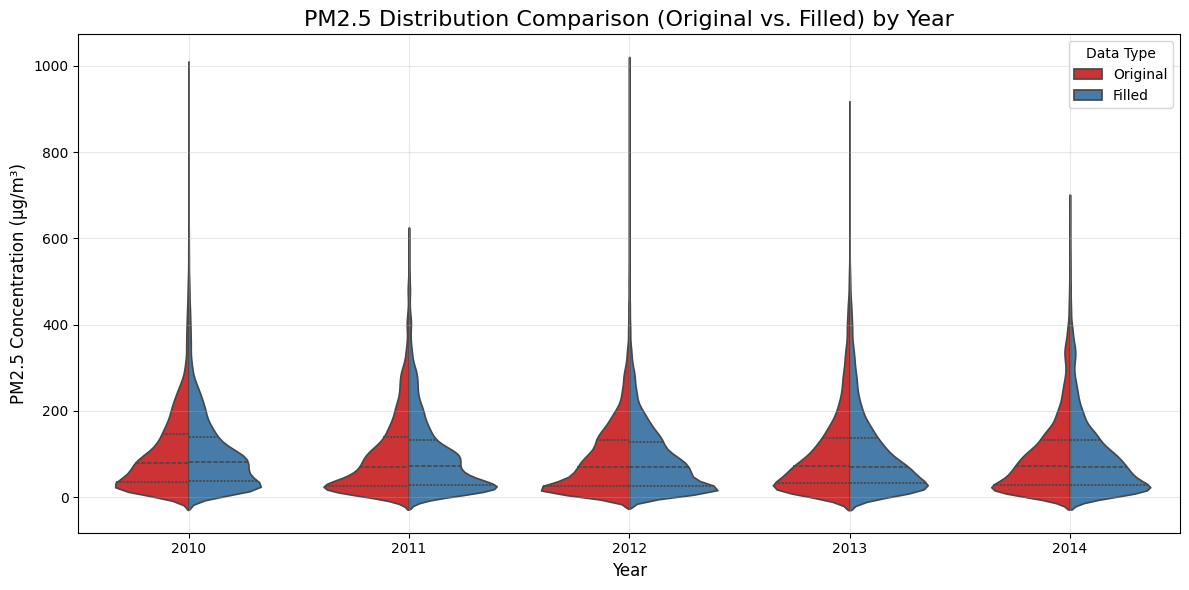


Correlation between PM2.5 and PM2.5_filled: 1.00


In [ ]:
# Violin Plots for Comparison Across Years

data['Year'] = data.index.year
# Change the value_name to something else like 'PM25_value'
df_melted = data.melt(id_vars=['Year'], value_vars=['PM2.5', 'PM2.5_filled'], var_name='Type', value_name='PM25_value')
df_melted['Type'] = df_melted['Type'].map({'PM2.5': 'Original', 'PM2.5_filled': 'Filled'})

# Plot violin plot
plt.figure(figsize=(12, 6))
# Change the y argument to the new value_name
# Define the color palette using a built-in Seaborn palette or a custom list of colors
colors = sns.color_palette("Set1")  # Example: Using "Set1" palette
sns.violinplot(x='Year', y='PM25_value', hue='Type', data=df_melted, split=True,
               palette=colors, inner='quartile')
plt.title('PM2.5 Distribution Comparison (Original vs. Filled) by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.legend(title='Data Type', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('yearly_distribution_comparison_violin.png')
plt.show()

# --- Combined Statistics ---
pm25_stats = data[['PM2.5', 'PM2.5_filled']].describe().T  # Transpose for better display
pm25_stats.index = ['Original PM2.5', 'Filled PM2.5']  # Set index names
pm25_styled = pm25_stats.style.format("{:.3f}").set_caption("<b><font size='4'>Descriptive Statistics for PM2.5 (Original vs. Filled)</font></b>")

# --- Display ---
display(pm25_styled)

# Correlation (unchanged)
correlation = data['PM2.5'].corr(data['PM2.5_filled'])
print(f"\n\033[1mCorrelation between PM2.5 and PM2.5_filled: {correlation:.2f}\033[0m")

---

## 🔑 Key Insights:

- The **filled distribution closely follows** the original one, with near-identical statistical properties.
- Violin plots confirm that yearly distributional characteristics are preserved post-imputation.
- The **correlation between original and filled PM2.5** values is **1.00**, confirming fidelity.
- The strategy blends **temporal awareness** (daily cycles) with **robustness** (medians), ensuring reliable reconstruction without distortion.


---

#**2.  FEATURE ENGINEERING**

---

This section contains:
- Correlation analysis
- outliers/imbalance analysis and handling
- Encoding categorical features
- ..... Other forms of feature engineering......
- ...
-...

---
##**I. OVERVIEW OF THE RELATIONSHIP BETWEEN THE NUMERICAL FEATURES**

To begin the feature engineering process, we explore the pairwise relationships between key numerical variables using pair plots and correlation matrices. This helps us assess potential feature importance, detect redundancies, and uncover non-linear or seasonal patterns.

We focus on the following variables:

- `PM2.5` and `PM2.5_filled`: Target variable (original and imputed)  
- `Temp`: Temperature  
- `Press`: Atmospheric Pressure  
- `WindSpeed`: Wind Speed  
- `DewP`: Dew Point  

These visual tools allow us to validate environmental dependencies and later inform our modeling and feature selection steps.


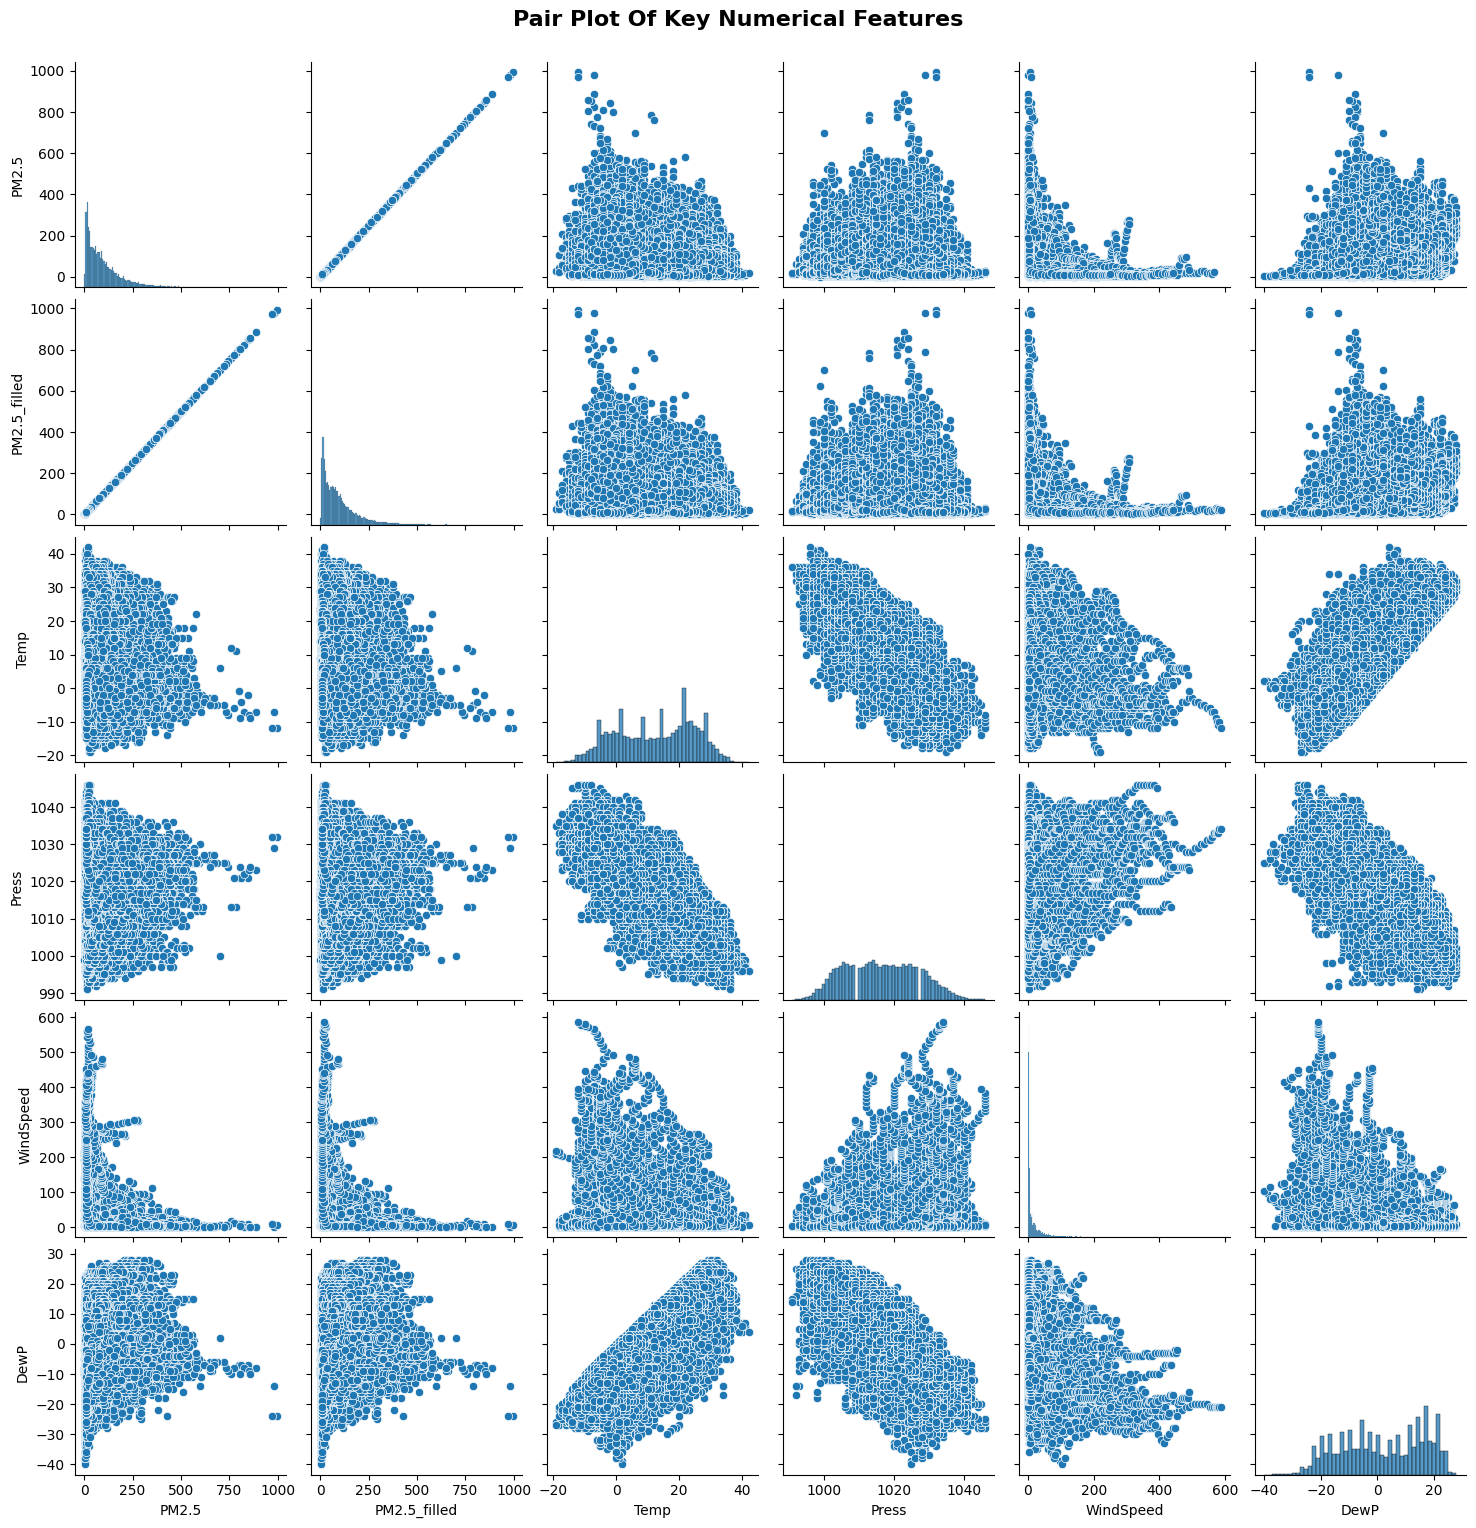

In [ ]:
# Pair plot for the most important numerous variables
numerical_variables = ['PM2.5', 'PM2.5_filled', 'Temp', 'Press', 'WindSpeed', 'DewP']

# Create a pair plot for the selected variables
g = sns.pairplot(data[numerical_variables])  # Assign the plot to a variable 'g'

# Add a title using 'g.fig.suptitle'
g.fig.suptitle("Pair Plot Of Key Numerical Features", fontsize=16, fontweight='bold', y=1.02)

plt.show()

In [ ]:
# Correlation matrix of all of the variables

# Only numerical columns for correlation calculation
numerical_data = data_imputed.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
correlation_matrix

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

NameError: name 'data_imputed' is not defined

---
## 🔑 Key Insights:

- **PM2.5 vs Temperature**  
  - High **PM2.5** at **lower temperatures (<10°C)**, confirming winter pollution peaks.  
  - Likely linked to **coal burning** and **temperature inversions trapping pollutants**.  
  - **Non-linear trend**, suggesting other influencing factors.

- **PM2.5 vs Wind Speed**  
  - **Strong negative correlation**: High pollution occurs when **wind speeds are low (<5 m/s)**.  
  - **Extreme pollution spikes** appear near **0 m/s**, showing accumulation during stagnant conditions.

- **PM2.5 vs Atmospheric Pressure**  
  - **PM2.5 increases** with pressure up to ~**1025 hPa**, then **declines**.  
  - Indicates that **high-pressure systems** may trap pollutants, a typical winter pattern.

- **PM2.5 vs PM2.5_filled**  
  - Very **strong agreement** between original and imputed values.  
  - Confirms that our imputation process preserved the underlying distribution.


---
##**II. OUTLIER DETECTION AND TEMPORAL TRENDS**

---


In this section, we apply **two outlier detection techniques**—IQR and Z-score—on key environmental variables such as `PM2.5`, `Dew Point`, `Temperature`, `Pressure`, and `Wind Speed`. This helps us **identify anomalies** in the dataset and understand the overall distribution shape before feature normalization or modeling.

- **IQR Method**: Flags extreme values that fall outside 1.5× the interquartile range.
- **Z-score Method**: Detects statistical outliers based on deviation from the mean.

We then visualize the **daily trends and distributions** for each of these features using:
- **Scatter plots with 30-day rolling averages** (to reveal smoothed seasonal cycles),
- **Histograms + KDE curves** (to highlight skewness, modality, and value density).


In [ ]:
def detect_outliers(data, features):
    """
    Detects outliers using IQR and Z-score methods and returns a DataFrame with results.

    Args:
        data (pd.DataFrame): The input DataFrame.
        features (list): List of numerical features to check for outliers.

    Returns:
        pd.DataFrame: DataFrame with outlier information for each feature.
    """

    outlier_info = []

    for feature in features:
        if pd.api.types.is_numeric_dtype(data[feature]):
            # IQR Method
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound_iqr = Q1 - 2 * IQR
            upper_bound_iqr = Q3 + 2 * IQR
            outliers_iqr_count = len(data[(data[feature] < lower_bound_iqr) | (data[feature] > upper_bound_iqr)])

            # Z-score Method
            z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
            z_score_threshold = 3
            outliers_zscore_count = len(data[z_scores > z_score_threshold])

            outlier_info.append([feature, outliers_iqr_count, outliers_zscore_count])

    return pd.DataFrame(outlier_info, columns=["Feature", "IQR Outliers", "Z-score Outliers"])

# Example usage:
relevant_features = ['PM2.5', 'DewP', 'Temp', 'Press', 'WindSpeed']
outlier_results = detect_outliers(data, relevant_features)

# Display results in a formatted table
display(outlier_results)  # Using display to render as a table

Feature  IQR Outliers  Z-score Outliers
0      PM2.5           959               769
1       DewP             0                 0
2       Temp             0                 0
3      Press             0                 0
4  WindSpeed          4224              1163

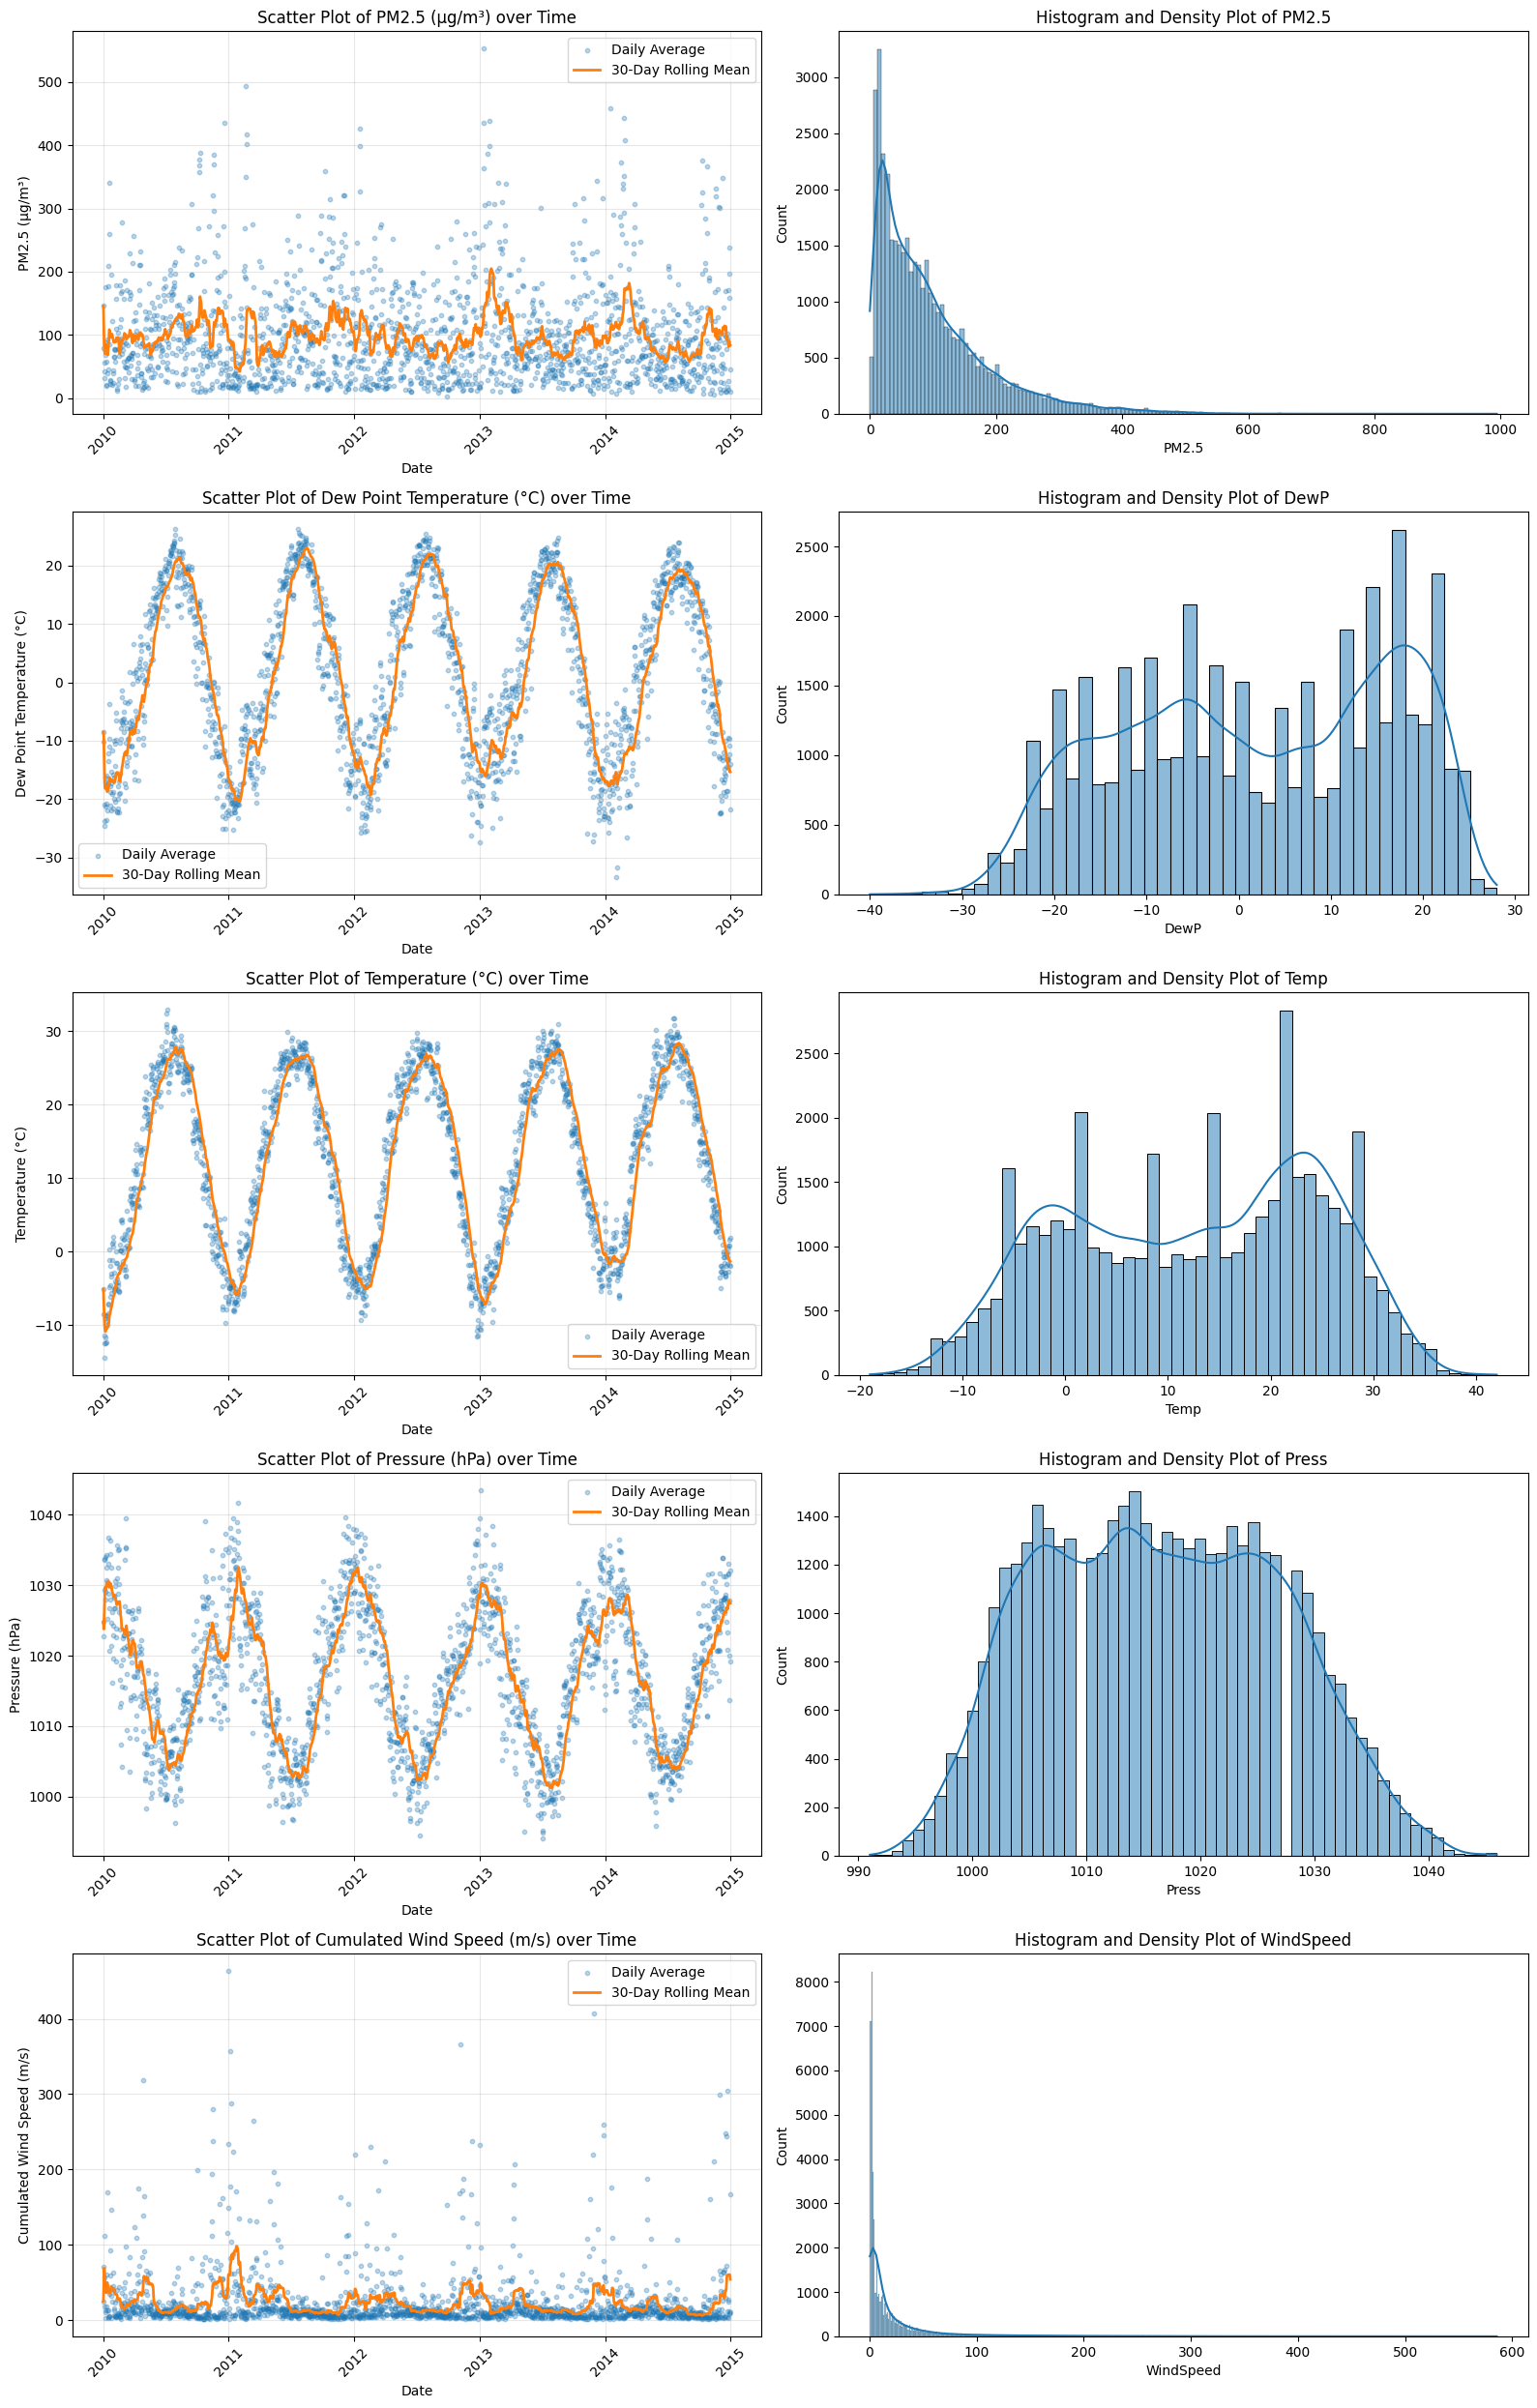

In [ ]:
# Define the features to plot (adjusted for Beijing PM2.5 dataset)
features = ['PM2.5', 'DewP', 'Temp', 'Press', 'WindSpeed']
feature_labels = {
    'PM2.5': 'PM2.5 (µg/m³)',
    'DewP': 'Dew Point Temperature (°C)',
    'Temp': 'Temperature (°C)',
    'Press': 'Pressure (hPa)',
    'WindSpeed': 'Cumulated Wind Speed (m/s)'
}

# Resample data to daily averages to reduce noise in scatter plots
data_daily = data[features].resample('D').mean()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(len(features), 2, figsize=(16, 5 * len(features)))

# Custom colors
scatter_color = '#1f77b4'  # Blue for scatter
rolling_color = '#ff7f0e'  # Orange for rolling mean

# Loop through features and create plots
for i, feature in enumerate(features):
    # Scatter plot with daily averages
    axes[i, 0].scatter(data_daily.index, data_daily[feature], color=scatter_color, alpha=0.3, label='Daily Average', s=10)

   # Overlay a 30-day rolling mean to highlight trends
    rolling_mean = data_daily[feature].rolling(window=30, min_periods=1).mean()
    axes[i, 0].plot(data_daily.index, rolling_mean, color=rolling_color, label='30-Day Rolling Mean', linewidth=2)

    # Customize the scatter plot
    axes[i, 0].set_title(f'Scatter Plot of {feature_labels[feature]} over Time', fontsize=12)
    axes[i, 0].set_xlabel('Date', fontsize=10)
    axes[i, 0].set_ylabel(feature_labels[feature], fontsize=10)
    axes[i, 0].grid(True, alpha=0.3)
    axes[i, 0].legend(fontsize=10)

    # Format the x-axis for dates
    axes[i, 0].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    axes[i, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Histogram and density plot
    sns.histplot(data[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram and Density Plot of {feature}')
    axes[i, 1].set_xlabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('feature_scatter_hist_plots.png')
plt.show()

---

## 🔑 Key Insights:

- **PM2.5**:
  - Shows a right-skewed distribution, with a **significant number of extreme pollution events**.
  - IQR flags ~950 outliers, while Z-score detects over 750—these are crucial for air quality alerts.

- **WindSpeed**:
  - Most extreme in terms of outliers: over **4200 (IQR)** and **1100 (Z-score)**.
  - Many values are clustered near 0, but some spikes go above 400 m/s, which are likely **sensor errors or invalid data entries**. Requires cleaning.

- **Temperature, Pressure, Dew Point**:
  - Exhibit **strong seasonal sinusoidal patterns** over the 5-year timeline, confirmed by the **smooth rolling mean lines**.
  - Their histograms are generally symmetric, indicating well-behaved features with relatively **low outlier counts**.


> These exploratory plots not only help detect **data quality issues**, but also **reveal seasonal trends** that might be useful for feature engineering later on (e.g., via sin/cos encoding or rolling statistics).

>We shall now proceed by dealing with handling the outliers for ```PM2.5``` and ```WindSpeed```.



---
##**III. WINDSPEED OUTLIER DETECTION & WINSORIZATION**
---

In this section, we address **extreme WindSpeed values** using the **99th percentile** as a threshold for outliers, followed by **winsorization** to cap unrealistic spikes. We also explore how these outliers relate to other weather variables.


---

###**Visualizing Extreme WindSpeed Outliers**


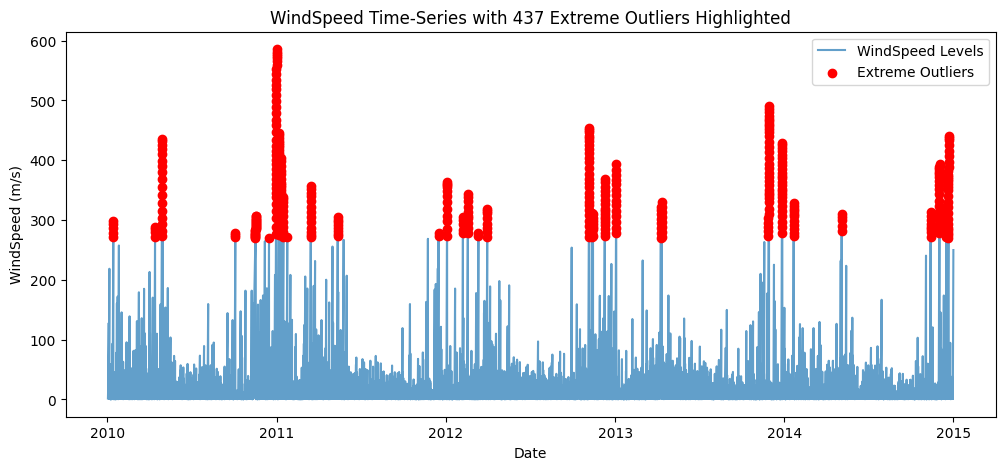

Threshold for extreme wind speeds (99th percentile): 269.12
Number of Extreme WindSpeed Outliers (WindSpeed > 269.12): 437
Proportion of extreme wind speeds: 1.00%


In [ ]:
# Step 1: Identify Extreme WindSpeed Outliers (e.g., WindSpeed > threshold)
threshold = data['WindSpeed'].quantile(0.99)  # using the 99th percentile
extreme_outliers_ws = data[data["WindSpeed"] > threshold]

# Step 2: Extract Relevant Data for Outlier Investigation (optional)
outlier_weather_stats_ws = extreme_outliers_ws[["WindSpeed", "Temp", "DewP", "PM2.5"]]

# Step 3: Visualize WindSpeed Over Time (Marking Extreme Outliers)
# Count the number of extreme outliers
extreme_outliers_ws_count = len(extreme_outliers_ws)

plt.figure(figsize=(12, 5))
plt.plot(data.index, data["WindSpeed"], label="WindSpeed Levels", alpha=0.7)
plt.scatter(extreme_outliers_ws.index, extreme_outliers_ws["WindSpeed"], color="red", label="Extreme Outliers", zorder=2)
plt.xlabel("Date")
plt.ylabel("WindSpeed (m/s)")
plt.title(f"WindSpeed Time-Series with {extreme_outliers_ws_count} Extreme Outliers Highlighted")
plt.legend()
plt.show()


#Use the 99th percentile as a cutoff for "very high" wind speeds
threshold = data['WindSpeed'].quantile(0.99)

# Filter rows that exceed this threshold
extreme_windspeed = data[data['WindSpeed'] > threshold]

# Calculate the proportion of extreme wind speed values
proportion_extreme = len(extreme_windspeed) / len(data) * 100

print(f"Threshold for extreme wind speeds (99th percentile): {threshold:.2f}")


print(f"Number of Extreme WindSpeed Outliers (WindSpeed > {threshold:.2f}): {extreme_outliers_ws_count}")
print(f"Proportion of extreme wind speeds: {proportion_extreme:.2f}%")

---
## 🔑 Key Insights:
  - **437 records** flagged as extreme.
  - Most are **isolated spikes** reaching above **400–500 m/s**, highly implausible.


---

###**Analyzing WindSpeed Outliers in Relation to Other Weather Variables**

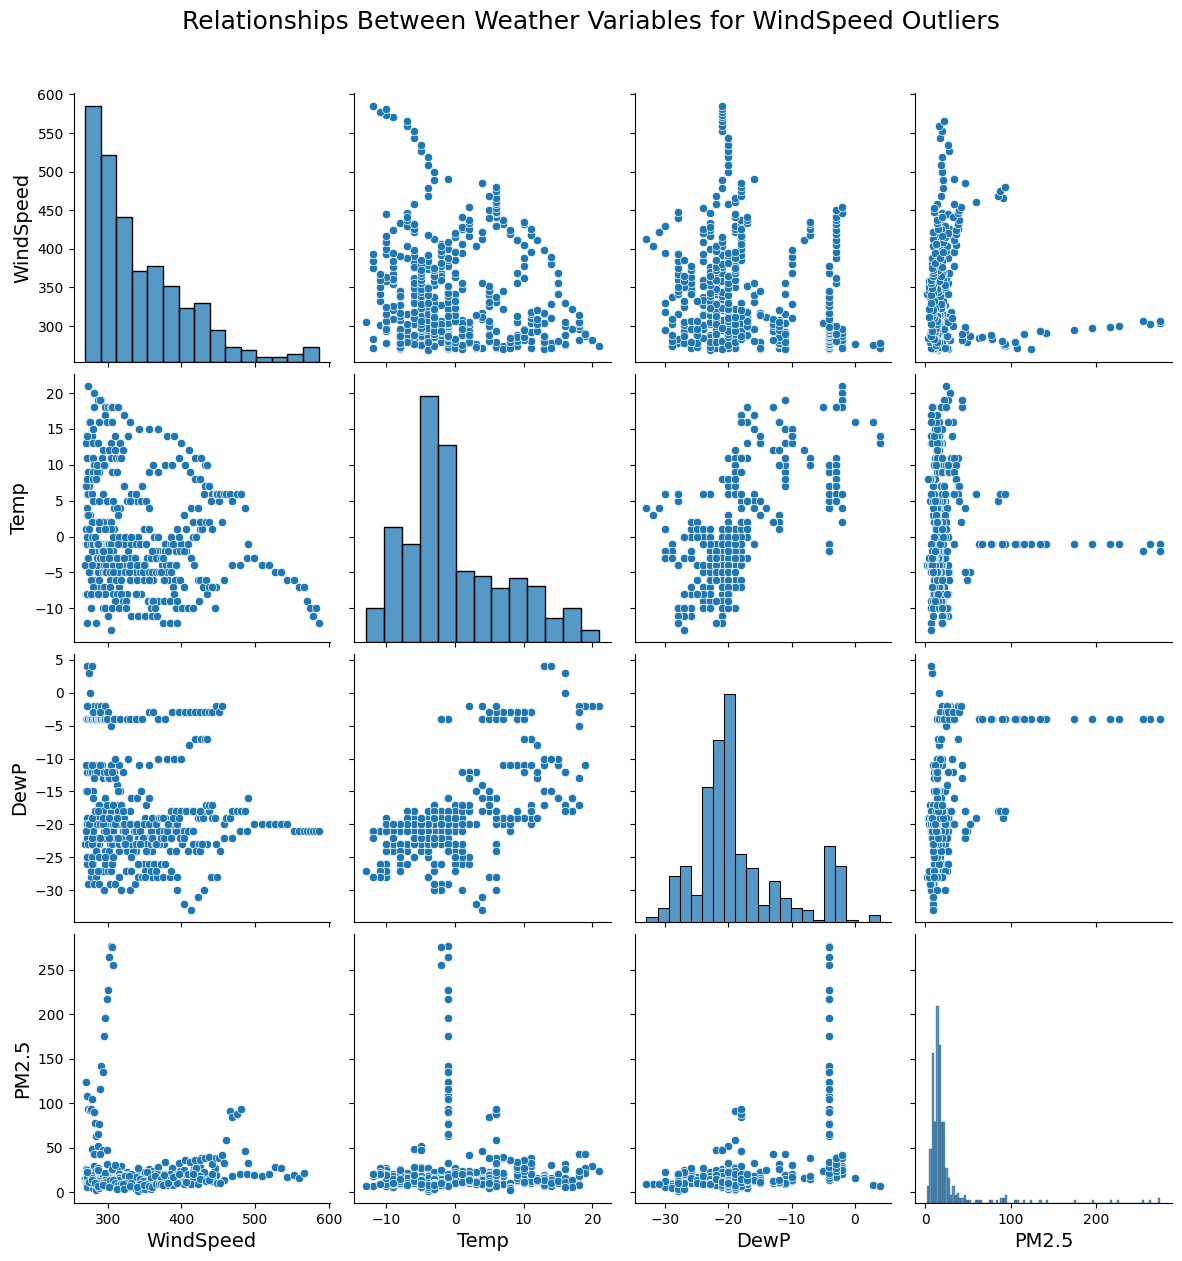


Descriptive Statistics for Outlier Weather Data:


WindSpeed        Temp        DewP       PM2.5
count  437.000000  437.000000  437.000000  410.000000
mean   342.433959   -0.054920  -18.162471   24.280488
std     65.383766    7.431134    7.386366   35.655124
min    269.550000  -13.000000  -33.000000    2.000000
25%    293.240000   -5.000000  -23.000000   11.000000
50%    321.410000   -2.000000  -20.000000   16.000000
75%    376.860000    5.000000  -16.000000   21.000000
max    585.600000   21.000000    4.000000  276.000000



Correlation Matrix for Outlier Weather Data:


In [ ]:
# Pair Plot Visualization
g = sns.pairplot(outlier_weather_stats_ws, size=3)
g.fig.suptitle("Relationships Between Weather Variables for WindSpeed Outliers",
               y=1.05, fontsize=18)
plt.show()

# Descriptive Statistics
print("\033[1m\nDescriptive Statistics for Outlier Weather Data:\033[0m")
display(outlier_weather_stats_ws.describe())
print()

# Correlation Analysis
print("\033[1m\nCorrelation Matrix for Outlier Weather Data:\033[0m")
correlation_matrix = outlier_weather_stats_ws.corr()
display(correlation_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))

---
## 🔑 Key Insights:
- **Weather During Outliers**:
  - `Temp` and `DewP` are typically **low**, suggesting cold fronts or storm conditions.
  - `PM2.5` shows slight **negative correlation** with WindSpeed (r ≈ -0.04), likely due to dispersion.

- **Pairplot & Correlation Matrix**:
  - Highlights weak relationships between WindSpeed and other variables.
  - `Temp` and `DewP` remain closely linked (`r ≈ 0.58`).

---
###**Winsorization of WindSpeed Values**

To handle extreme WindSpeed values, we apply a **winsorization technique** by capping all values above the **99th percentile (269.12 m/s)**.

- A new column `WindSpeed_Winsorized` is created.
- All values above the threshold are replaced with **269.12**, maintaining the structure while dampening extreme distortions.

**Purpose**: To reduce the influence of implausible spikes on downstream analysis while keeping the time-series structure intact.


In [ ]:

# Step 1: Calculate the 99th Percentile for WindSpeed Winsorization
# This is the threshold above which values will be capped.
winsor_limit_ws = data['WindSpeed'].quantile(0.99)
print(f"WindSpeed Winsorization threshold (99th percentile): {winsor_limit_ws:.2f}")

# Step 2: Apply Winsorization to the WindSpeed Variable
# Create a new column 'WindSpeed_Winsorized'. Values above winsor_limit_ws are replaced with winsor_limit_ws.
data['WindSpeed_Winsorized'] = np.where(data['WindSpeed'] > winsor_limit_ws, winsor_limit_ws, data['WindSpeed'])

WindSpeed Winsorization threshold (99th percentile): 269.12


---
###**Visual Comparison: Original vs Winsorized WindSpeed**


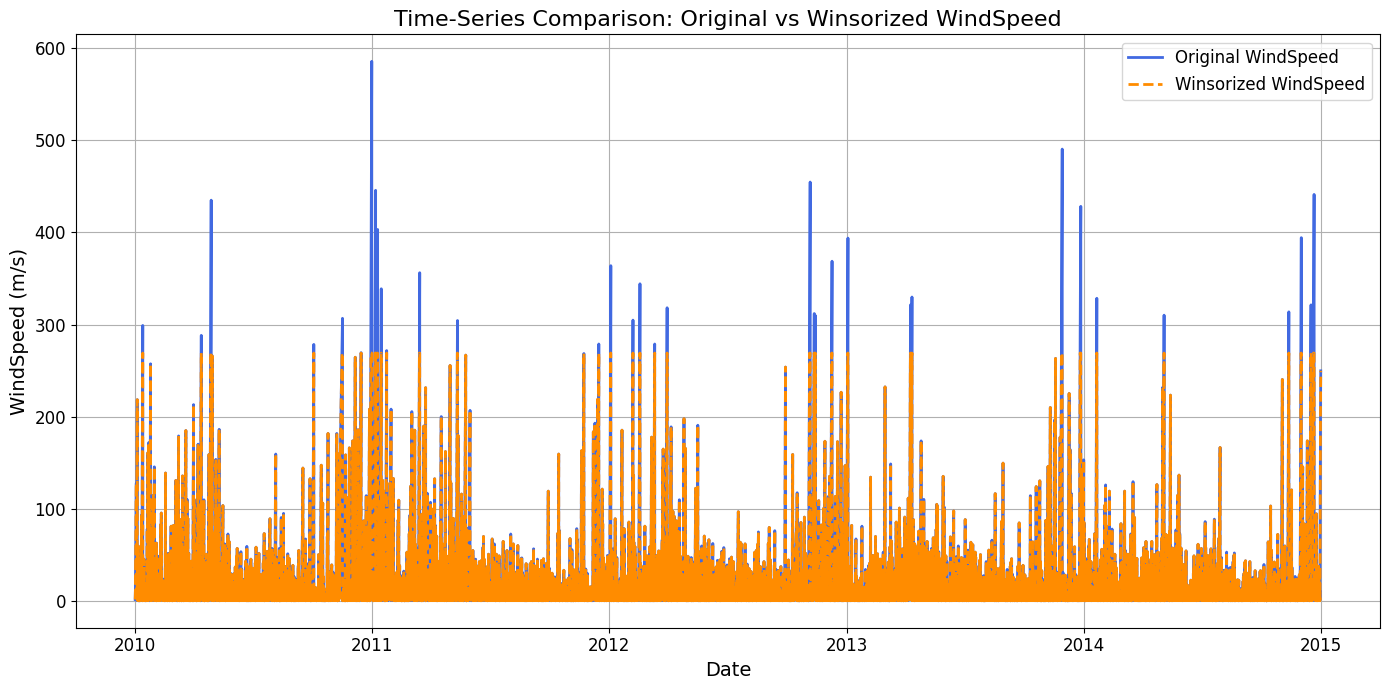

In [ ]:
# Visualize WindSpeed Over Time (Comparison)
plt.figure(figsize=(14, 7))

# Plot the original WindSpeed with a solid line in royal blue
plt.plot(data.index, data["WindSpeed"],
         label="Original WindSpeed",
         color='royalblue',
         linewidth=2)

# Plot the winsorized WindSpeed with a dashed line in dark orange
plt.plot(data.index, data["WindSpeed_Winsorized"],
         label="Winsorized WindSpeed",
         color='darkorange',
         linewidth=2,
         linestyle='--')

# Customize the labels and title
plt.xlabel("Date", fontsize=14)
plt.ylabel("WindSpeed (m/s)", fontsize=14)
plt.title("Time-Series Comparison: Original vs Winsorized WindSpeed", fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

---
## 🔑 Key Insights:
- **Original WindSpeed** (blue solid line): Preserves all raw values, including extreme spikes.
- **Winsorized WindSpeed** (orange dashed line): Caps extreme values at 269.12 m/s.
- **Temporal structure remains unchanged**, but volatility due to extreme events is reduced.
- Winsorization haw allowed us to preserve **overall seasonal trends** and data continuity while curbing outlier influence—a practical approach for modeling and visualization.


---
##**IV. PM2.5 OUTLIERS DETECTION AND FLAGGING**
---

In this section, we aim to:
- Identify unusually high PM2.5 concentrations.
- Understand their distribution over time.
- Flag them for modeling, or otherwise deal with them.
- Use signal decomposition (VMD) to detect and structure hidden patterns.


---
###**Year-wise Distribution of PM2.5 Levels**

We start by visualizing how PM2.5 concentrations vary across years using boxplots. This helps revealPersistent presence of high outliers across all years.


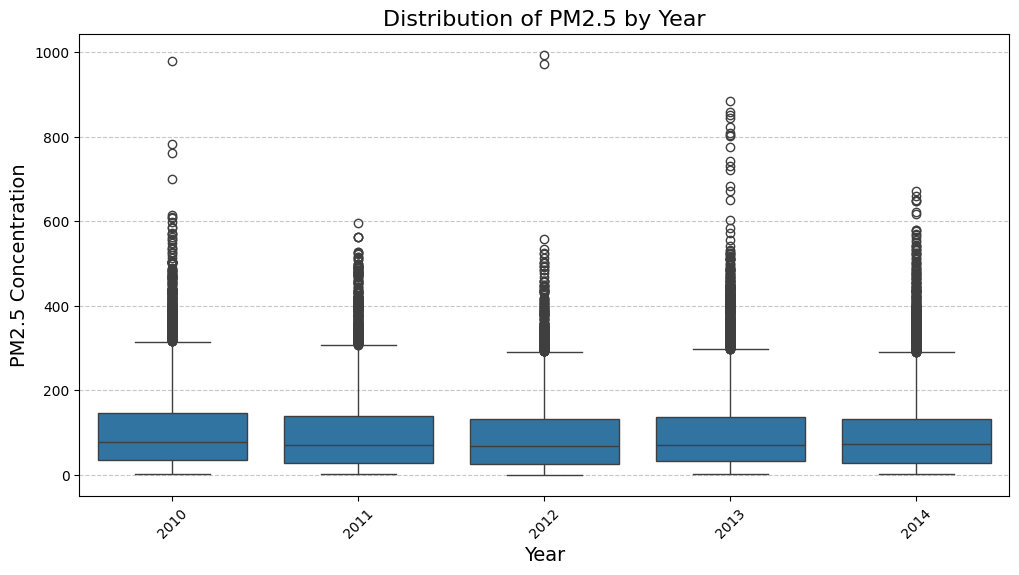

In [ ]:
# Visualize PM2.5 Distribution by Year

# Step 1: Extract year for visualization
data['Year'] = data.index.year

# Step 2: Plot PM2.5 distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Year'], y=data['PM2.5'])

# Step 3: Improve visualization
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration")
plt.title("Distribution of PM2.5 by Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## 🔑 Key Insights:

* **Numerous outliers** across all years → values above 400 μg/m³ are frequent and represent significant pollution events.
* **2013 has the most extreme pollution events**, with some values exceeding 900 μg/m³.
* **IQR is stable**, indicating consistent baseline pollution patterns across years despite outliers.

---
###**Cumulative Distribution of PM2.5 Levels**

Here, we plot the Cumulative Distribution Function (CDF) of PM2.5 values to quantify the rarity of extreme events.


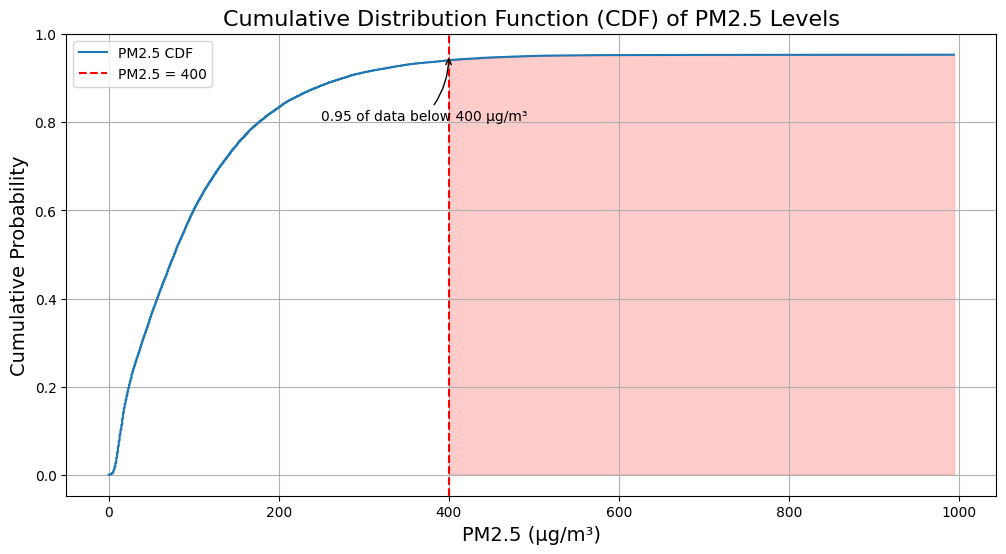

PM2.5 Range Percentage
0       0-200    83.224%
1     200-400    10.798%
2     400-600     1.189%
3     600-800     0.048%
4    800-1000     0.025%

In [ ]:
# Calculate the CDF
sorted_data = np.sort(data['PM2.5'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(sorted_data, cdf, label='PM2.5 CDF')

# Highlight the region above 400
plt.axvline(x=400, color='red', linestyle='--', label='PM2.5 = 400')
plt.fill_between(sorted_data, cdf, where=(sorted_data >= 400), color='red', alpha=0.2)

# Add labels and title
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of PM2.5 Levels")
plt.legend()
plt.grid(True)

# Calculate cdf_value_at_400
cdf_value_at_400 = cdf[np.abs(sorted_data - 400).argmin()]

# Add annotation for data below 400 with downward arrow and adjusted position on the LEFT
plt.annotate(f'{cdf_value_at_400:.2f} of data below 400 µg/m³',
             xy=(400, cdf_value_at_400),
             xytext=(250, cdf_value_at_400 - 0.15),  # Moved text to the LEFT and below the curve
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

# Show the plot with annotation
plt.show()

# Create and display the table
percentage_table = pd.DataFrame(percentage_data, columns=['PM2.5 Range', 'Percentage'])
display(percentage_table)

 ---
## 🔑 Key Insights:
- 95% of PM2.5 values fall below 400 μg/m³.
- The remaining ~5% are the tail events.
- This gives us a principled reference point for distinguishing between typical and extreme pollution.

---
###**Flagging Extreme PM2.5 Outliers (> 700 μg/m³)**

Using a strict threshold of 700 μg/m³, we mark data points representing extreme pollution events.


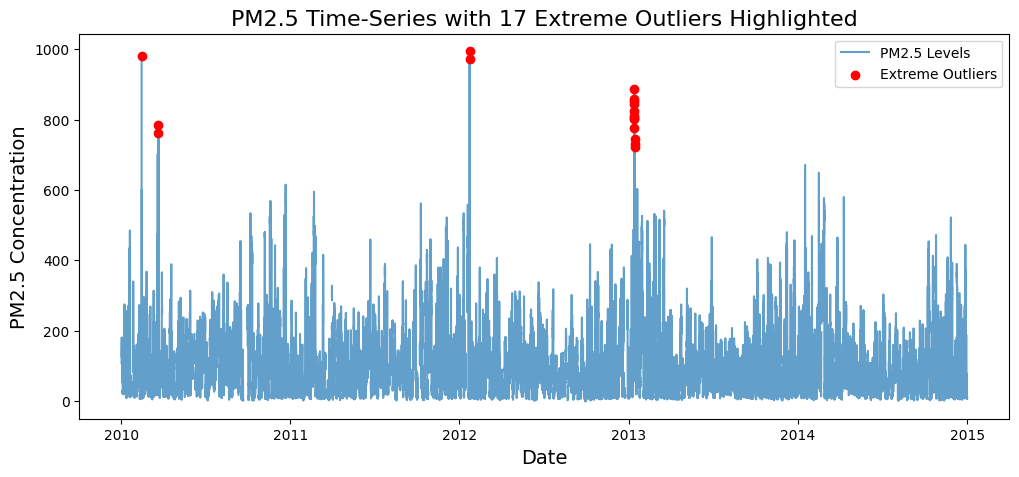

Number of Extreme Outliers (PM2.5_filled > 700 μg/m³): 18


In [ ]:
# Step 1: Identify possible PM2.5 Outliers (e.g., PM2.5 > 700 μg/m³)
extreme_outliers = data[data["PM2.5_filled"] > 700]

# Step 2: Extract Relevant Data for Outlier Investigation
outlier_weather_stats = extreme_outliers[["PM2.5_filled", "Temp", "DewP" , "WindSpeed"]]

# Step 3: Visualize PM2.5 Over Time (Marking Extreme Outliers)
plt.figure(figsize=(12, 5))
plt.plot(data.index, data["PM2.5"], label="PM2.5 Levels", alpha=0.7)
plt.scatter(extreme_outliers.index, extreme_outliers["PM2.5"], color="red", label="Extreme Outliers", zorder=2)
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.title(f"PM2.5 Time-Series with {extreme_outliers_count} Extreme Outliers Highlighted")
plt.legend()
plt.show()

# Count the number of possible outliers
extreme_outliers_count = len(extreme_outliers)
print(f"Number of Extreme Outliers (PM2.5_filled > 700 μg/m³): {extreme_outliers_count}")

In [ ]:
data['Extreme_PM25'] = data['PM2.5'] > 700


## 🔑 Key Insights:

* 17 extreme outliers identified (PM2.5 > 700 μg/m³).
* Highest recorded spike (~1000 μg/m³) in early 2012.
* Clusters of outliers around January in multiple years → potential seasonal impact.
* Outliers become less frequent after 2013, but occasional peaks persist.
* **These extreme events could provide valuable training examples** for our ML models to recognize severe pollution conditions.

We choose to **preserve** these records and **flag them** for modeling, as they might represent critical edge cases.

---
###**RETAINING THE EXTREME VALUES?**

Outliers, especially in environmental data, often carry crucial information. Here’s why we retain them:

- They reflect genuine environmental episodes (e.g., Chinese New Year, smog storms).
- They provide **edge-case learning** opportunities for ML models.

Instead of suppressing them, we identify and tag these records and handle them explicitly in modeling workflows.


---
###**VMD: Decomposing the PM2.5 Signal**

To better understand the temporal structure of pollution spikes, we apply **Variational Mode Decomposition (VMD)**.

VMD is a signal processing technique that decomposes a complex time series into a set of **oscillatory components (modes)**, each representing different frequency patterns.

VMD helps us:
- Isolate high-frequency spikes (e.g. sudden smog events).
- Separate baseline seasonal patterns from volatile behavior.
- Identify structurally distinct "pollution regimes" in the data.

Here, we decompose the PM2.5 time series into **four intrinsic modes** using the `vmdpy` package.




In [ ]:
pip install vmdpy


In [ ]:
from vmdpy import VMD

def apply_vmd(signal, alpha=2000, tau=0, K=4, DC=0, init=1, tol=1e-7):
    """
    Apply VMD to a 1D signal.
    Returns an array of decomposed modes.
    """
    u, u_hat, omega = VMD(signal, alpha, tau, K, DC, init, tol)
    return u

# Decompose using VMD
modes = apply_vmd(signal, K=4)


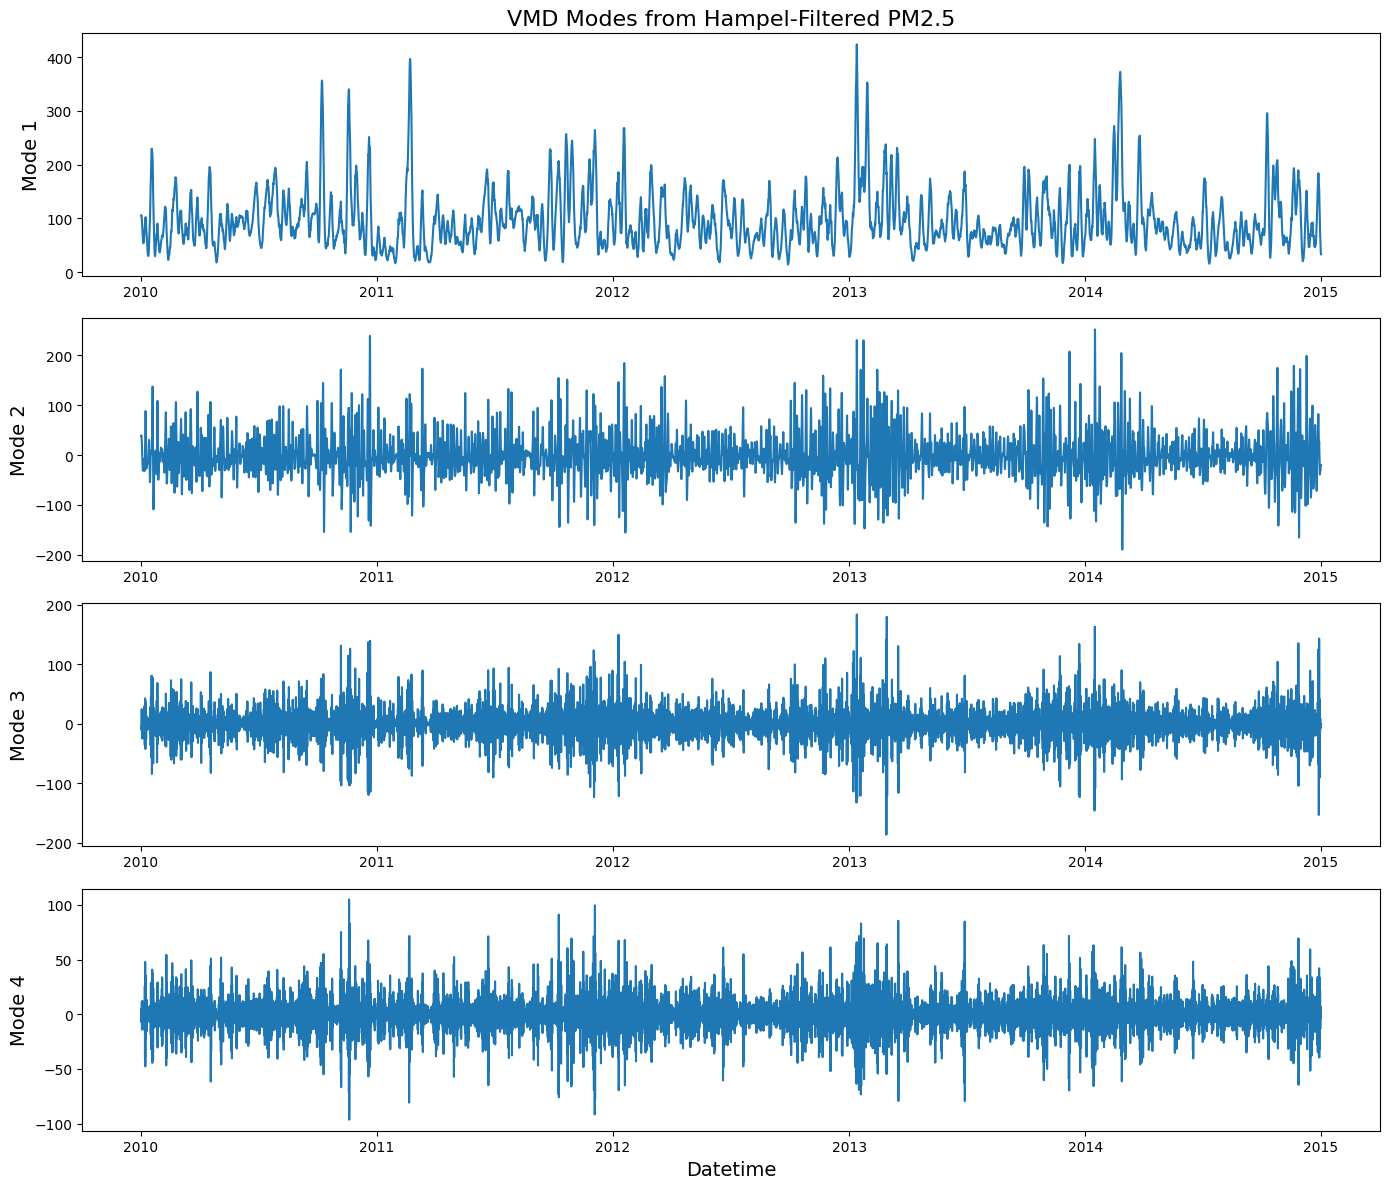

In [ ]:
plt.figure(figsize=(14, 12))
for i in range(modes.shape[0]):
    plt.subplot(modes.shape[0], 1, i+1)
    plt.plot(data.index, modes[i])
    plt.ylabel(f'Mode {i+1}')
    if i == 0:
        plt.title('VMD Modes')
    if i == modes.shape[0]-1:
        plt.xlabel('Datetime')
    plt.tight_layout()
plt.show()

---
## 🔑 Key Insights:
- **Mode 1** captures high-frequency bursts and sharp spikes—our primary interest for extreme event detection.
- **Modes 2–4** reflect mid- and low-frequency variations such as seasonal cycles and background fluctuation.

This decomposition allows us to separate noise from structure, and **isolate spikes as separate signal components**, rather than contamination.

---
###**Exploring Spike Thresholds in VMD Mode 1**

We visualize `Mode 1` from VMD with proposed thresholds at 200 and 300. This helps assess:

- At what amplitude we consider a fluctuation to be “spike-worthy.”
- Whether the 95th percentile or fixed visual thresholds are more interpretable.

This threshold selection enables us to flag meaningful pollution bursts, even when the raw PM2.5 doesn’t exceed 700.


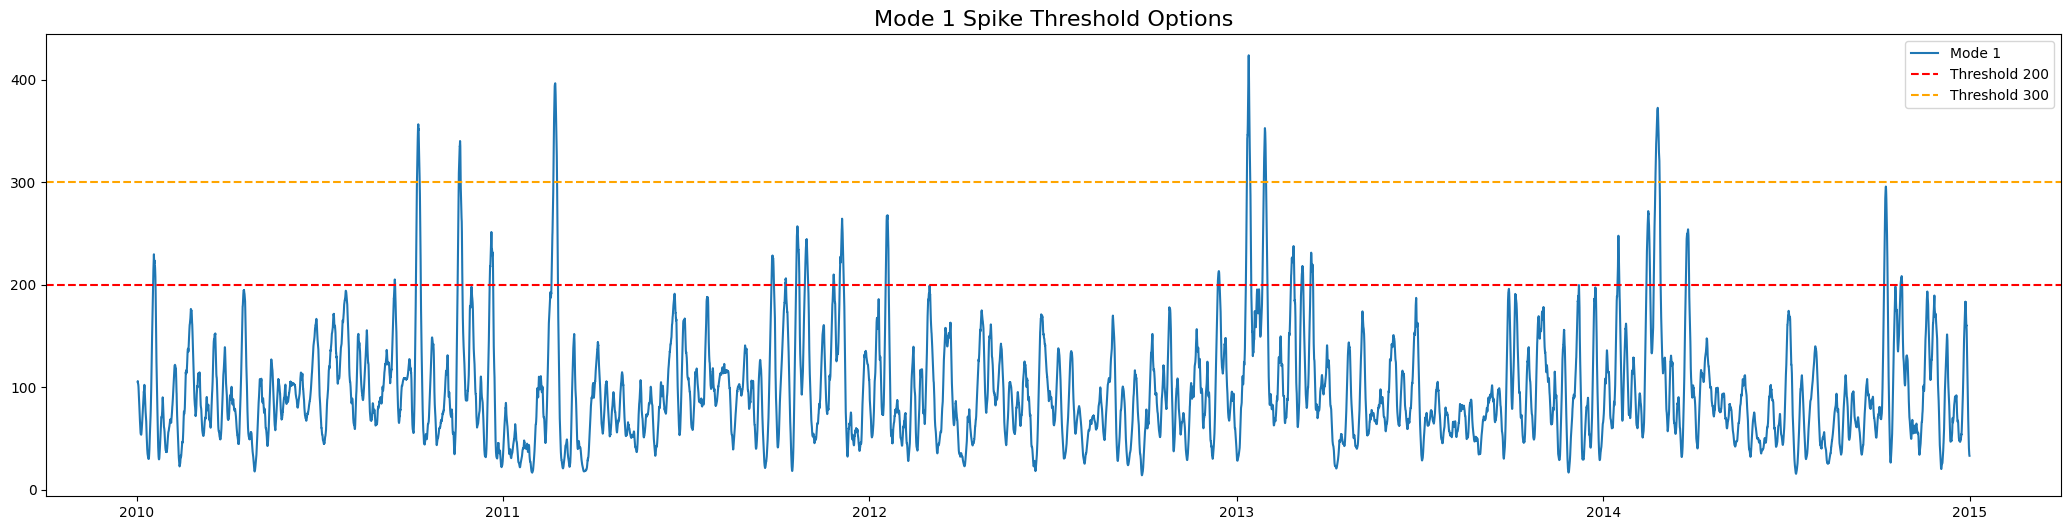

In [ ]:
plt.figure(figsize=(26, 6))
mode_1 = modes[0]  # Assign the first mode from 'modes' to 'mode_1'
plt.plot(data.index, mode_1, label="Mode 1")
plt.axhline(200, color='red', linestyle='--', label='Threshold 200')
plt.axhline(300, color='orange', linestyle='--', label='Threshold 300')
plt.legend()
plt.title("Mode 1 Spike Threshold Options")
plt.show()

---
###**CREATING THE EXTREME EVENTS FEATURE**

To translate the insights from our VMD analysis into a usable modeling signal, we generate a new binary flag: `Extreme_Event_VMD`.



In [ ]:
mode_1 = modes[0]  # Assuming you stored VMD modes earlier
vmd_threshold = np.quantile(mode_1, 0.95)
data['Extreme_Event_VMD'] = mode_1 > vmd_threshold


- This flag identifies points where **Mode 1** exceeds the 95th percentile threshold (or a chosen value like 200).
- These represent **intense short-term volatility events**, distinct from gradual pollution build-ups.

This flag complements our earlier value-based flag (`Extreme_PM25`) and allows us to capture structurally significant events that may not always involve extreme PM2.5 levels.

---
##**FINAL OUTCOME: DUAL OUTLIER FLAGS**

We now have **two distinct ways of representing pollution extremes** in the data:

1. **`Extreme_PM25`** — a value-based flag (e.g., PM2.5 > 700 µg/m³)
2. **`Extreme_Event_VMD`** — a structure-based flag derived from VMD Mode 1 dynamics

Each captures a different kind of signal, one based on pollutant level, the other on pattern behavior.

With both flags in place, we can now test how different representations affect model performance. Possible configurations include:

- **Raw values only**
- **Raw + VMD modes** (e.g., Mode 1–4 as numerical features)
- **Raw + Flags** (`Extreme_PM25` and `Extreme_Event_VMD`)
- **All combined**: raw values + VMD modes + both flags

This layered experimentation helps assess whether temporal structure (captured by VMD) can enhance prediction beyond raw concentration spikes.



---

#**V. IMBALANCES IN AND PREPROCESSING OF CATAGORICAL VARIABLES**


---
##**Exploring Rare Weather Events: HoursOfRain and HoursOfSnow**

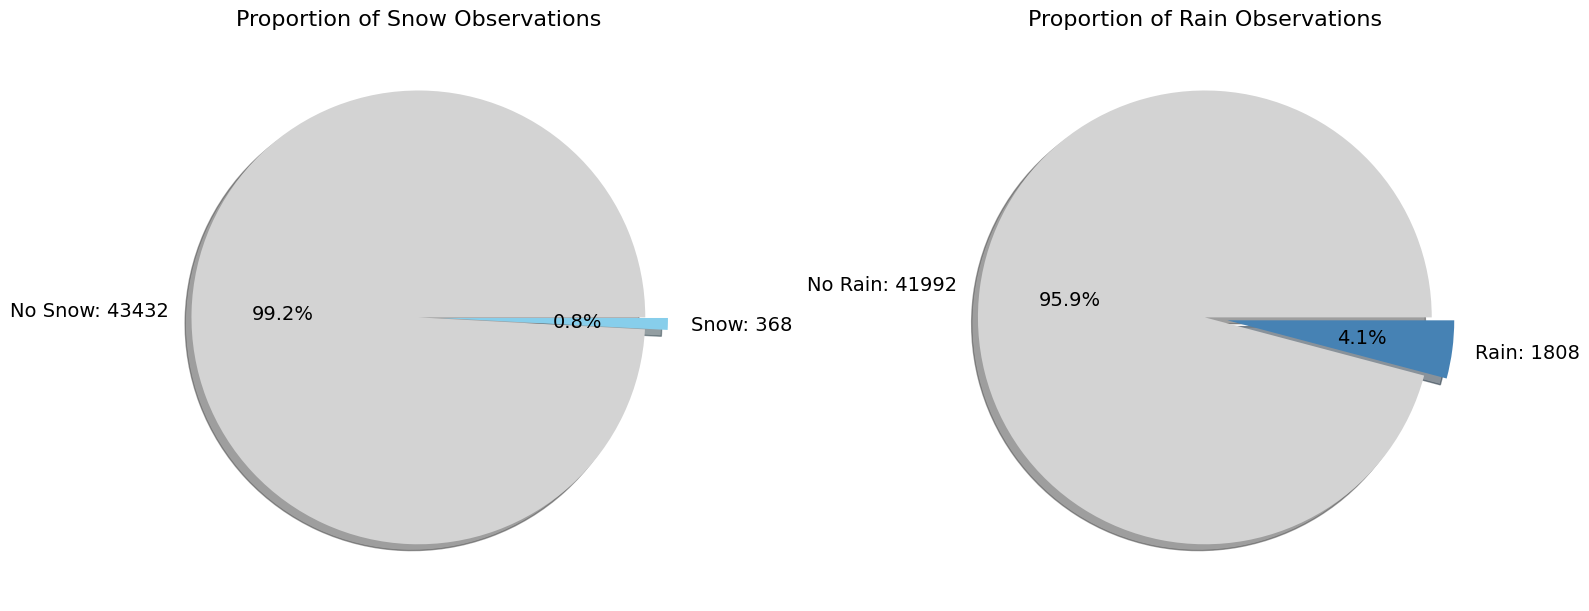

Correlation between HoursOfSnow and PM2.5: 0.01926557605149959
Correlation between HoursOfRain and PM2.5: -0.05136870554128981


In [ ]:
# Create a figure with a grid for subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Snow zero vs non-zero pie chart
snow_zeros = (data['HoursOfSnow'] == 0).sum()
snow_non_zeros = (data['HoursOfSnow'] > 0).sum()
axes[0].pie([snow_zeros, snow_non_zeros],
            labels=[f'No Snow: {snow_zeros}', f'Snow: {snow_non_zeros}'],
            autopct='%1.1f%%', colors=['lightgray', 'skyblue'],
            explode=(0, 0.1), shadow=True, textprops={'fontsize': 14})
axes[0].set_title('Proportion of Snow Observations', fontsize=16)

# Rain zero vs non-zero pie chart
rain_zeros = (data['HoursOfRain'] == 0).sum()
rain_non_zeros = (data['HoursOfRain'] > 0).sum()
axes[1].pie([rain_zeros, rain_non_zeros],
            labels=[f'No Rain: {rain_zeros}', f'Rain: {rain_non_zeros}'],
            autopct='%1.1f%%', colors=['lightgray', 'steelblue'],
            explode=(0, 0.1), shadow=True, textprops={'fontsize': 14})
axes[1].set_title('Proportion of Rain Observations', fontsize=16)

plt.tight_layout()
plt.savefig('weather_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Analysis
correlation_snow = data['HoursOfSnow'].corr(data['PM2.5'])
correlation_rain = data['HoursOfRain'].corr(data['PM2.5'])
print(f"Correlation between HoursOfSnow and PM2.5: {correlation_snow}")
print(f"Correlation between HoursOfRain and PM2.5: {correlation_rain}")

---
## 🔑 Key Insights:


- **Snow** occurs in only **0.8%** of the data.
- **Rain** occurs in just **4.1%** of the records.
- Both features have **very weak correlation with PM2.5**:
  - Snow: **+0.019**
  - Rain: **−0.051**

At first glance, both features appear **too sparse** and **weakly correlated** to justify inclusion. However, we test this assumption more rigorously in the next step.



---

# **Can These Features Still Be Useful?**  

To assess whether these features offer any **predictive signal**, we trained **Random Forest Regression models** using three setups:

- One with the **raw categorical variable** (HoursOfRain / HoursOfSnow)
- One with a **24-hour rolling sum**, capturing recent accumulation
- One **without the feature** at all (baseline)

> The rolling feature captures **how much rain/snow occurred over the past day**, not just in a single hour.

> This provides a **short-term memory** of recent rainfall, which may affect PM2.5 by clearing particles from the air or altering atmospheric conditions.

> In contrast, a single-hour rain reading may miss these cumulative effects entirely.

This should help us answer:
**Can a rolling version of these features help improve predictive modelling?**

---

##🌧️ **Hours of Rain:**



Model  Mean Absolute Error (MAE)  \
0          With HoursOfRain                  49.784574   
1  With Rolling HoursOfRain                  46.245804   
2       Without HoursOfRain                  50.166820   

   Root Mean Squared Error (RMSE)  R-Squared (R²)  
0                       75.055294        0.338639  
1                       71.384547        0.401748  
2                       75.633285        0.328413

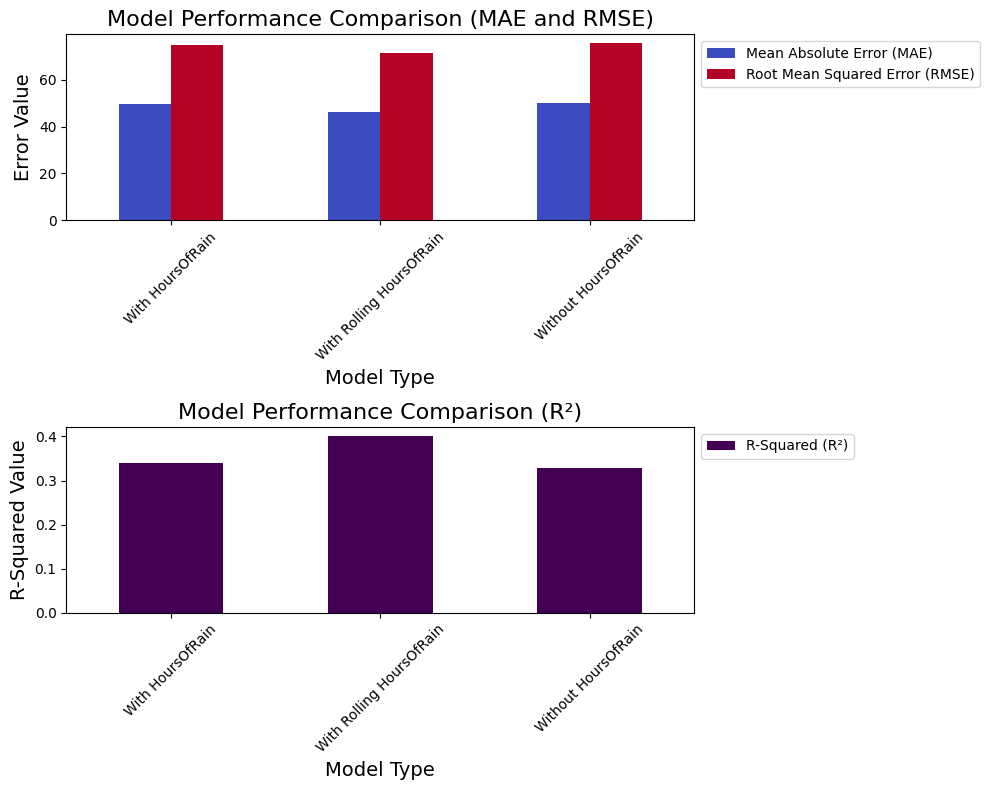

In [ ]:
# Feature Engineering
data['HoursOfRain_rolling'] = data['HoursOfRain'].rolling(window=24, min_periods=1).sum()

# Define features and target
# Using PM2.5_filled as the target variable
features_with_rain = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain']
features_with_rolling_rain = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain_rolling']
features_without_rain = ['DewP', 'Temp', 'Press', 'WindSpeed']
target = 'PM2.5_filled'  # Changed from 'PM2.5'

# Split data
X_train_rain, X_test_rain, y_train, y_test = train_test_split(
    data[features_with_rain], data[target], test_size=0.2, random_state=42
)
X_train_rolling_rain, X_test_rolling_rain, _, _ = train_test_split(
    data[features_with_rolling_rain], data[target], test_size=0.2, random_state=42
)
X_train_no_rain, X_test_no_rain, _, _ = train_test_split(
    data[features_without_rain], data[target], test_size=0.2, random_state=42
)

# Train models
model_with_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_with_rolling_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_without_rain = RandomForestRegressor(n_estimators=100, random_state=42)

model_with_rain.fit(X_train_rain, y_train)
model_with_rolling_rain.fit(X_train_rolling_rain, y_train)
model_without_rain.fit(X_train_no_rain, y_train)

# Make predictions
y_pred_with_rain = model_with_rain.predict(X_test_rain)
y_pred_with_rolling_rain = model_with_rolling_rain.predict(X_test_rolling_rain)
y_pred_without_rain = model_without_rain.predict(X_test_no_rain)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_with_rain, rmse_with_rain, r2_with_rain = evaluate_model(y_test, y_pred_with_rain)
mae_with_rolling_rain, rmse_with_rolling_rain, r2_with_rolling_rain = evaluate_model(y_test, y_pred_with_rolling_rain)
mae_without_rain, rmse_without_rain, r2_without_rain = evaluate_model(y_test, y_pred_without_rain)

# Display results
comparison_df = pd.DataFrame({
    "Model": ["With HoursOfRain", "With Rolling HoursOfRain", "Without HoursOfRain"],
    "Mean Absolute Error (MAE)": [mae_with_rain, mae_with_rolling_rain, mae_without_rain],
    "Root Mean Squared Error (RMSE)": [rmse_with_rain, rmse_with_rolling_rain, rmse_without_rain],
    "R-Squared (R²)": [r2_with_rain, r2_with_rolling_rain, r2_without_rain]
})

display(comparison_df)
print("\n\n")

# Visualize results
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

comparison_df[['Model', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']].set_index("Model").plot(kind='bar', ax=axes[0], colormap="coolwarm")
axes[0].set_title("Model Performance Comparison (MAE and RMSE)")
axes[0].set_ylabel("Error Value")
axes[0].set_xlabel("Model Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

comparison_df[['Model', 'R-Squared (R²)']].set_index("Model").plot(kind='bar', ax=axes[1], colormap="viridis")
axes[1].set_title("Model Performance Comparison (R²)")
axes[1].set_ylabel("R-Squared Value")
axes[1].set_xlabel("Model Type")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

---
## 🔑 Key Insights:

- The **raw `HoursOfRain`** variable had minimal impact on model performance.  
- However, the **rolling version (24-hour sum)** slightly improved all metrics:
  - Highest **R² (0.401)** and lowest **MAE/RMSE**
- The rolling feature captures **short-term rain accumulation**, which may affect air quality through atmospheric cleansing or changes in particle dispersion.

> Even though rain is rare, its **temporal context**—captured by rolling features—can provide meaningful short-term predictive value.

---

## ❄️ **Hours of Snow:**


Model  Mean Absolute Error (MAE)  \
0          With HoursOfSnow                  50.204024   
1  With Rolling HoursOfSnow                  49.270035   
2       Without HoursOfSnow                  50.166820   

   Root Mean Squared Error (RMSE)  R-Squared (R²)  
0                       75.543358        0.330010  
1                       74.040917        0.356395  
2                       75.633285        0.328413

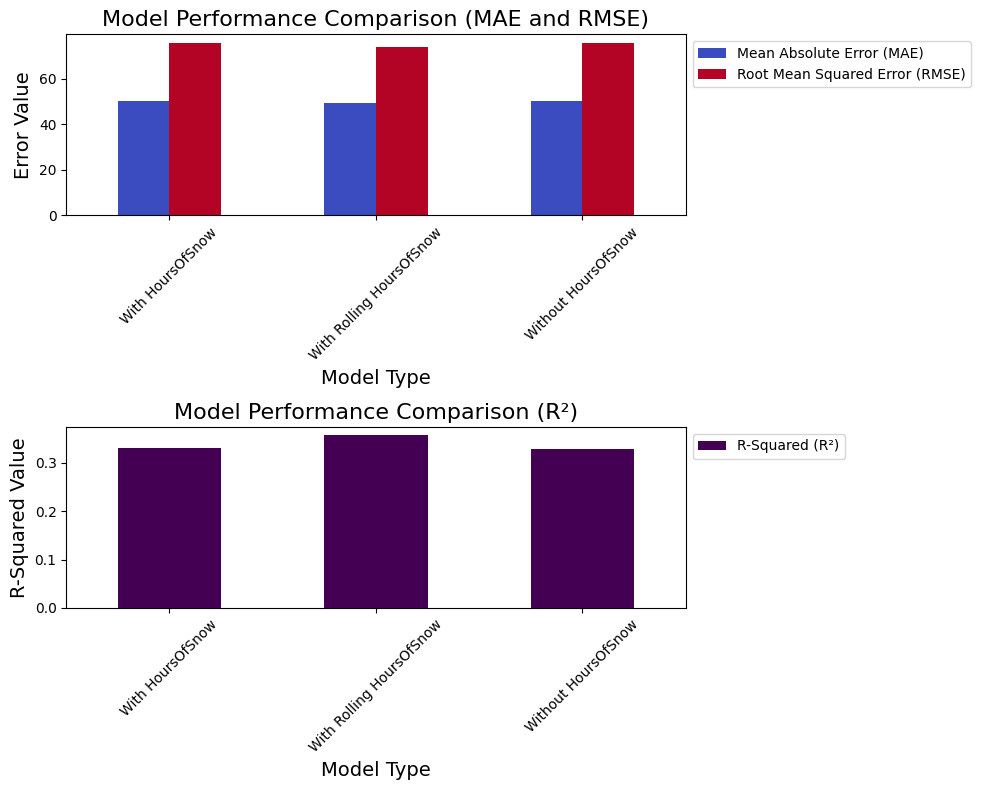

In [ ]:
# --- Feature Engineering for HoursOfSnow (creating a rolling sum) ---
data['HoursOfSnow_rolling'] = data['HoursOfSnow'].rolling(window=24, min_periods=1).sum()

# --- Define features and target ---
features_with_snow = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow']
features_with_rolling_snow = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow_rolling']
features_without_snow = ['DewP', 'Temp', 'Press', 'WindSpeed']
target = 'PM2.5_filled'  # Using the filled PM2.5 as the target

# --- Split data into training and testing sets ---
X_train_snow, X_test_snow, y_train, y_test = train_test_split(
    data[features_with_snow], data[target], test_size=0.2, random_state=42
)
X_train_rolling_snow, X_test_rolling_snow, _, _ = train_test_split(
    data[features_with_rolling_snow], data[target], test_size=0.2, random_state=42
)
X_train_no_snow, X_test_no_snow, _, _ = train_test_split(
    data[features_without_snow], data[target], test_size=0.2, random_state=42
)

# --- Train RandomForestRegressor models ---
model_with_snow = RandomForestRegressor(n_estimators=100, random_state=42)
model_with_rolling_snow = RandomForestRegressor(n_estimators=100, random_state=42)
model_without_snow = RandomForestRegressor(n_estimators=100, random_state=42)

model_with_snow.fit(X_train_snow, y_train)
model_with_rolling_snow.fit(X_train_rolling_snow, y_train)
model_without_snow.fit(X_train_no_snow, y_train)

# --- Make predictions ---
y_pred_with_snow = model_with_snow.predict(X_test_snow)
y_pred_with_rolling_snow = model_with_rolling_snow.predict(X_test_rolling_snow)
y_pred_without_snow = model_without_snow.predict(X_test_no_snow)

# --- Evaluate models using MAE, RMSE, and R² ---
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_with_snow, rmse_with_snow, r2_with_snow = evaluate_model(y_test, y_pred_with_snow)
mae_with_rolling_snow, rmse_with_rolling_snow, r2_with_rolling_snow = evaluate_model(y_test, y_pred_with_rolling_snow)
mae_without_snow, rmse_without_snow, r2_without_snow = evaluate_model(y_test, y_pred_without_snow)

# --- Display results in a DataFrame ---
comparison_df = pd.DataFrame({
    "Model": ["With HoursOfSnow", "With Rolling HoursOfSnow", "Without HoursOfSnow"],
    "Mean Absolute Error (MAE)": [mae_with_snow, mae_with_rolling_snow, mae_without_snow],
    "Root Mean Squared Error (RMSE)": [rmse_with_snow, rmse_with_rolling_snow, rmse_without_snow],
    "R-Squared (R²)": [r2_with_snow, r2_with_rolling_snow, r2_without_snow]
})

display(comparison_df)
print("\n\n")

# --- Visualize results using bar plots ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

comparison_df[['Model', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']].set_index("Model").plot(kind='bar', ax=axes[0], colormap="coolwarm")
axes[0].set_title("Model Performance Comparison (MAE and RMSE)")
axes[0].set_ylabel("Error Value")
axes[0].set_xlabel("Model Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

comparison_df[['Model', 'R-Squared (R²)']].set_index("Model").plot(kind='bar', ax=axes[1], colormap="viridis")
axes[1].set_title("Model Performance Comparison (R²)")
axes[1].set_ylabel("R-Squared Value")
axes[1].set_xlabel("Model Type")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

---
## 🔑 Key Insights:

- Like rain, the **raw `HoursOfSnow`** was not useful on its own.  
- The **rolling sum** version performed slightly better than both the raw and excluded models.
- The effect was less pronounced than for rain, likely due to **even lower frequency** and possibly less direct impact on PM2.5 levels.

> Snow may contribute to pollution variation in specific conditions (e.g., winter stagnation), but its predictive value is limited to edge cases and is less consistent than rain.



---
## **Conclusion**


> A rolling feature transforms a **single-hour signal into a cumulative one**—tracking **recent conditions over time**.  
> This gives the model richer temporal context and can reveal **slow-building effects** that isolated hourly values may miss.


Although `HoursOfRain` and `HoursOfSnow` appear weak based on distribution and correlation, **exploratory modeling** shows that rolling versions can add subtle but **real predictive value**.



---
##**WIND DIRECTION**
---

In [ ]:
# Imbalance Analysis for 'WinDir'
windir_counts = data['WinDir'].value_counts()
windir_proportions = windir_counts / len(data)
print(windir_proportions)

In [ ]:
# Distribution for 'WinDir'
plt.figure(figsize=(8, 5))
sns.countplot(x='WinDir', data=data, color="black")
plt.title('Distribution of Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

### **Wind Direction Imbalance**
- Wind directions are **not evenly distributed**, leading to potential class imbalance.
- **SE (35.5%) and NW (30.2%) dominate**, while **NE is the least frequent (11.8%)**.
- **NE’s low occurrence** may make it less influential in models.
- If wind direction is an important factor for PM2.5 prediction:
  - Consider **checking its impact on pollution levels**.
  - **Resampling methods** (oversampling NE or undersampling SE) could help balance the dataset.


# Understanding the Cyclical Nature of Wind Direction

Wind direction is measured in degrees from 0° to 360°, where 0° (or 360°) represents North. The key aspect is that values at the extremes of this range are conceptually close. For example, a wind direction of 350° (almost North) is very similar to a wind direction of 10° (also close to North).

Standard categorical encoding methods like one-hot encoding treat each wind direction category as independent. This means the model doesn't inherently understand the proximity between, say, 'NW' and 'N' or 'N' and 'NE'. This can be a limitation if the cyclical relationship is important for predicting PM2.5.



### Transforming Wind Direction into Continuous Features using Sine and Cosine:
A common and effective way to represent cyclical data like wind direction in a way that preserves its cyclical nature is by using sine and cosine transformations. Here's how it works:

1. Convert Degrees to Radians:
Most trigonometric functions in programming languages expect input in radians. You need to convert the wind direction from degrees to radians using the formula:
radians = degrees * (π / 180)

2. Calculate Sine and Cosine: For each wind direction value (in radians), calculate its sine and cosine:
sine_value = sin(radians)
cosine_value = cos(radians)

3. Create New Features: These sine and cosine values become two new numerical features in your dataset.


#### Why does this work?

Preserves Cyclicality: When you plot the sine and cosine of angles from 0° to 360°, you see a continuous cycle. Wind directions that are close in degrees will also have sine and cosine values that are close to each other in the 2D space formed by these two features.

Provides Two Dimensions: Instead of a single angle, you now have two continuous features. This allows the model to learn more complex relationships with wind direction. For example, a model can learn that winds from the North (0° or 360°) might have a different impact than winds from the South (180°), and this difference is captured by the distinct sine and cosine values.

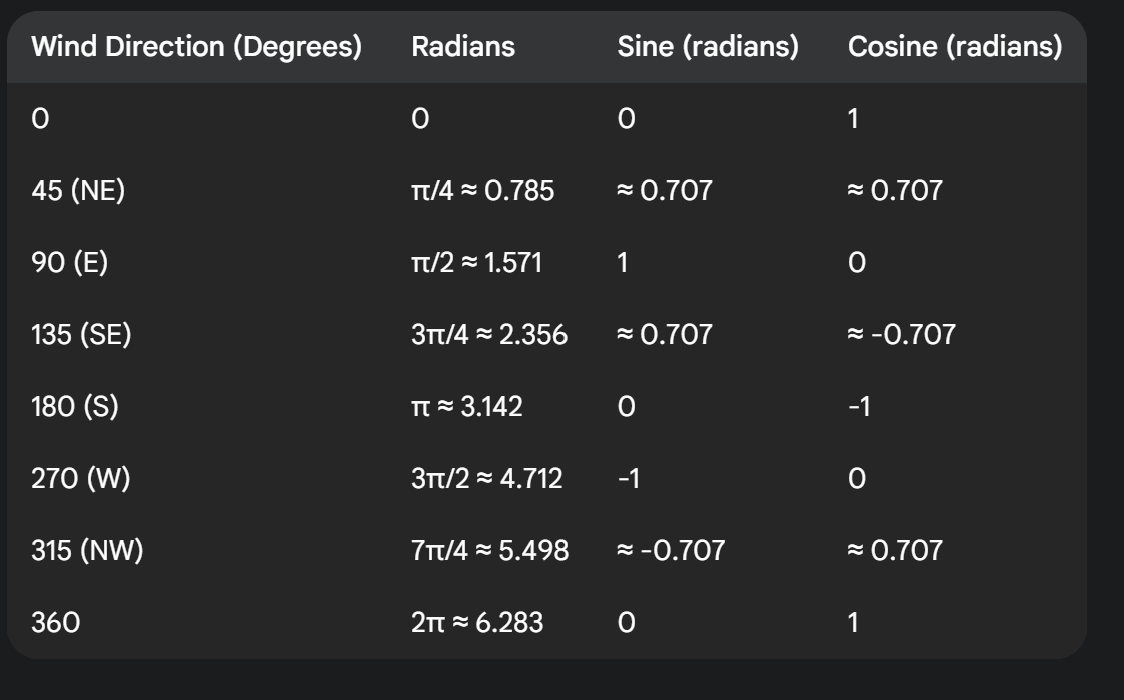

Notice how 0° and 360° have the same sine and cosine values, reflecting their proximity. Similarly, directions that are close to each other have similar sine and cosine values.


In order to use the sine and cosine transformation for wind direction, we first need to convert the categorical values in the "WinDir" column (like 'NW', 'SE', 'NE') into numerical degrees.

Since '- cv' implies no specific direction, perhaps assigning it to 0 (North) or considering it as a separate category later might be options. However, assigning 0 might be misleading.

A pragmatic approach could be to treat it as a state with no specific directional component in the sine/cosine representation. This is tricky with a direct degree mapping.

Let's try mapping it to 0 degrees for now, but keep in mind this might need refinement based on your analysis.

In [ ]:
wind_direction_mapping = {
    'n': 0,
    'nne': 22.5,
    'ne': 45,
    'ene': 67.5,
    'e': 90,
    'ese': 112.5,
    'se': 135,
    'sse': 157.5,
    's': 180,
    'ssw': 202.5,
    'sw': 225,
    'wsw': 247.5,
    'w': 270,
    'wnw': 292.5,
    'nw': 315,
    'nnw': 337.5,
    'cv': 0
}

Standard Meteorological Convention:

The mapping provided is based on the common way wind direction is represented in degrees, where:

0° (or 360°): North (N)
90°: East (E)
180°: South (S)
270°: West (W)
The intermediate directions are then evenly spaced between these cardinal directions:

NNE: Halfway between North (0°) and Northeast (45°) -> 22.5°
NE: Halfway between North (0°) and East (90°) -> 45°
ENE: Halfway between Northeast (45°) and East (90°) -> 67.5°
And so on...
This system divides the compass into 16 principal directions, each separated by 22.5 degrees.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Step 0: Preserve the Original Data
data_original = data.copy()  # Preserve the raw data
data_imputed = data_original.copy()  # Create a working copy for preprocessing

# Step 1: Create Datetime-based and Additional Features
data_imputed['date'] = pd.to_datetime(data_imputed[['Year', 'Month', 'Day']])
data_imputed['day_of_week'] = data_imputed['date'].dt.dayofweek
data_imputed['is_weekend'] = data_imputed['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data_imputed['Season'] = pd.cut(data_imputed['Month'],
                                bins=[0, 3, 6, 9, 12],
                                labels=['Winter', 'Spring', 'Summer', 'Fall'],
                                include_lowest=True)
data_imputed['time_of_day'] = pd.cut(data_imputed['Hour'],
                                     bins=[0, 6, 12, 18, 24],
                                     labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                     include_lowest=True)

# Normalize wind direction values to lowercase
data_imputed['WinDir'] = data_imputed['WinDir'].str.lower()
print("Unique wind direction values after normalization:", data_imputed['WinDir'].unique())

# Check for unmapped wind direction values:
unique_wind_directions_in_data = data_imputed['WinDir'].unique()
mapped_wind_directions = wind_direction_mapping.keys()
unmapped_wind_directions = [
    direction for direction in unique_wind_directions_in_data if direction not in mapped_wind_directions
]
if unmapped_wind_directions:
    print("The following wind direction values were not found in your mapping:")
    for direction in unmapped_wind_directions:
        print(f"- {direction}")
else:
    print("All wind direction values in the data were found in the mapping.")

# Step 2: Convert Wind Direction to Degrees and then to Sine/Cosine
data_imputed['WindDirection_Degrees'] = data_imputed['WinDir'].map(wind_direction_mapping)
if data_imputed['WindDirection_Degrees'].isnull().any():
    print("Warning: Some wind direction values were not mapped. Please check your data.")

data_imputed['WindDirection_Radians'] = data_imputed['WindDirection_Degrees'] * (np.pi / 180)
data_imputed['WindDirection_Sin'] = np.sin(data_imputed['WindDirection_Radians'])
data_imputed['WindDirection_Cos'] = np.cos(data_imputed['WindDirection_Radians'])

In [ ]:
# Drop the original 'WinDir' column
#data_imputed = data_imputed.drop(columns=['WinDir'])

# Step 3: One-Hot Encode Categorical Variables (Excluding Wind Direction)
data_imputed = pd.get_dummies(data_imputed, columns=['Season', 'time_of_day', 'WinDir'],
                              prefix=['Season', 'time', 'WinDir'])

# Step 4: Scale Numerical Features
numerical_features = ['Temp', 'Press', 'DewP', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain']
scaler = StandardScaler()
data_imputed[numerical_features] = scaler.fit_transform(data_imputed[numerical_features])

# Step 5: Save and Verify Preprocessed Data
data_imputed.to_csv('preprocessed_data_with_sin_cos_wind.csv', index=False)
print(f'Original data shape: {data_original.shape}')
print(f'Preprocessed data shape: {data_imputed.shape}')

# Step 6: Visualize PM2.5 Distribution After Preprocessing
if not os.path.exists('plots'):
    os.makedirs('plots')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_original['PM2.5'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('PM2.5 Distribution (Before Preprocessing)')
plt.xlabel('PM2.5')
plt.subplot(1, 2, 2)
sns.histplot(data_imputed['PM2.5'], kde=True, bins=30, color='lightcoral')
plt.title('PM2.5 Distribution (After Preprocessing)')
plt.xlabel('PM2.5')
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# First, define the names of the other features you want to include:
other_features = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain', 'HoursOfSnow']

# Define the names of the sine and cosine wind direction columns.
wind_direction_cols = ['WindDirection_Sin', 'WindDirection_Cos']

# Combine them into the full feature set.
features_for_importance = other_features + wind_direction_cols

# Define target variable.
target = 'PM2.5_filled'

# Split the data into training and test sets.
X = data_imputed[features_for_importance]
y = data_imputed[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the RandomForestRegressor model.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Evaluate the model performance later
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2  = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# Compute and Visualize Feature Importances
importances = rf_model.feature_importances_
feat_importance_df = pd.DataFrame({
    'Feature': features_for_importance,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The primary goal of the above code is to determine which features in the preprocessed dataset are most important for predicting the PM2.5_filled values. It achieves this by training a RandomForestRegressor model and then examining the feature importances assigned by this model.

##

In [ ]:
# 1. The numeric features and wind‐direction dummies
num_feats = ['PM2.5_filled','DewP','Temp','Press','WindSpeed']
wind_cols = [c for c in data_imputed.columns if c.startswith('wind_')]

# 2. The combined correlation matrix
corr_df = data_imputed[num_feats + wind_cols].corr()

# 3. Plot it
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix for PM2.5 & Wind‑Direction Dummies", fontsize=16)
plt.tight_layout()
plt.show()


## Experimentation with models and features and how



*   What kind of ML models can we use and for what? Should we use a classifier or a regression or both? Look at the purpose statement at the begining and see if it is sensible or  it should be changed or altered?
What kind of features and feature engineering will we need for whatever models can be useful to our dataset and project purpose?


*  In general what type of cool ML shit can we do and how?





In [ ]:
data_imputed.columns

## 1. Scale Numerical Features

In [ ]:
numerical_features = [
    'DewP',                    # Dew point
    'Temp',                    # Temperature
    'Press',                   # Pressure
    'WindSpeed_Winsorized',    # Winsorized wind speed
    'HoursOfRain',             # Raw rain hours
    'HoursOfSnow',             # Raw snow hours
]

# Standardize them
scaler = StandardScaler()
data_imputed[numerical_features] = scaler.fit_transform(data_imputed[numerical_features])

## 2. Cyclical / Continuous Encodings

How Regression Models Interpret Features: Most standard regression models (like Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost) are designed to work with numerical input features. They learn relationships based on the numerical values themselves.

The Problem with Raw Cyclical Data:

* Raw Numbers: If you feed a cyclical feature like 'Hour' (0-23)
directly as a single numerical feature, the model will treat it as having a linear relationship. It will see 23 as being "far" from 0, when in reality, 23:00 is just one hour away from 00:00. This misrepresents the true relationship. The same applies to Month (1-12) and Wind Direction Degrees (0-360).
One-Hot Encoding (for Cyclical Data): While one-hot encoding handles categorical data well, for cyclical categories, it treats each category as completely independent. It doesn't capture the inherent proximity between categories at the extremes of the cycle (e.g., the model doesn't automatically know that Hour 23 and Hour 0 are close, or that North and Northwest/Northeast are related). This can lead to a loss of information about the smooth transitions within the cycle.
Why Sine and Cosine Transformation is Needed: The sine and cosine transformations convert the cyclical feature (an angle or position on a circle) into two continuous numerical features.

These two features together uniquely represent each point on the circle.
Crucially, values that are close in the cycle (like 0° and 360° for wind direction, or hour 23 and hour 0) will have sine and cosine values that are also close in the 2D space defined by the sine and cosine axes.
This allows the regression models to learn the smooth, cyclical relationships between these features and the target variable.
Your Code Snippet:

The code you provided correctly performs these cyclical transformations:

* Wind Direction: It converts the degrees to radians and then calculates the sine and cosine. You'll then use WindDir_sin and WindDir_cos as features.
* Hour of Day: It converts the hour (0-23) into a position on a 24-hour circle (radians) and calculates the sine and cosine. You'll use Hour_sin and Hour_cos.
Month of Year: It converts the month (1-12) into a position on a 12-month circle (radians) and calculates the sine and cosine. You'll use Month_sin and Month_cos.

In Summary:

* Performing these cyclical / continuous encodings is a crucial preprocessing step. Your regression models need the cyclical information to be presented in a format they can understand and learn from effectively. The sine and cosine transformation achieves this by mapping the cyclical feature onto a 2D plane in a way that preserves the relationships at the cycle boundaries.

In [ ]:
# Wind direction (already mapped to degrees)
data_imputed['WindDir_rad']  = np.deg2rad(data_imputed['WindDirection_Degrees'])
data_imputed['WindDir_sin']  = np.sin(data_imputed['WindDir_rad'])
data_imputed['WindDir_cos']  = np.cos(data_imputed['WindDir_rad'])

# Hour of day
data_imputed['Hour_rad']     = 2*np.pi * data_imputed['Hour'] / 24
data_imputed['Hour_sin']     = np.sin(data_imputed['Hour_rad'])
data_imputed['Hour_cos']     = np.cos(data_imputed['Hour_rad'])

# Month of year
data_imputed['Month_rad']    = 2*np.pi * data_imputed['Month'] / 12
data_imputed['Month_sin']    = np.sin(data_imputed['Month_rad'])
data_imputed['Month_cos']    = np.cos(data_imputed['Month_rad'])

## 3. Lag + Rolling Features

In [ ]:
# Define the names of a key lag and a key rolling feature to check for
# If these exist, we assume the others have been created as well
check_lag_col = 'pm25_lag1'
check_roll_col = 'pm25_roll24_mean'

# Check if the lag and rolling columns already exist
if check_lag_col not in data_imputed.columns or check_roll_col not in data_imputed.columns:
    print("Creating lag and rolling window features...")
    # Lags of the target (strongest predictors in time series)
    for lag in [1, 2, 3, 6, 12, 24]:
        # Check if the specific lag column already exists before creating it (optional, but safer)
        lag_col_name = f'pm25_lag{lag}'
        if lag_col_name not in data_imputed.columns:
            data_imputed[lag_col_name] = data_imputed['PM2.5_filled'].shift(lag)
            print(f" - Created {lag_col_name}")
        else:
             print(f" - {lag_col_name} already exists, skipping creation.")


    # Rolling window stats over the last 24 hours
    if check_roll_col not in data_imputed.columns:
        data_imputed['pm25_roll24_mean'] = data_imputed['PM2.5_filled'].rolling(24).mean()
        print(f" - Created pm25_roll24_mean")
    else:
        print(f" - pm25_roll24_mean already exists, skipping creation.")

    roll_std_col = 'pm25_roll24_std'
    if roll_std_col not in data_imputed.columns:
        data_imputed[roll_std_col] = data_imputed['PM2.5_filled'].rolling(24).std()
        print(f" - Created {roll_std_col}")
    else:
         print(f" - {roll_std_col} already exists, skipping creation.")

    # After creating these, drop or impute the leading NaNs:
    # This dropna should ideally be done after all feature creation that might introduce NaNs
    # and before splitting the data. Ensure the columns used in subset exist.
    cols_to_check_for_nan = [f'pm25_lag{lag}' for lag in [1,2,3,6,12,24]] + ['pm25_roll24_mean', 'pm25_roll24_std']
    cols_to_check_for_nan = [col for col in cols_to_check_for_nan if col in data_imputed.columns] # Ensure columns exist before dropping

    initial_rows = data_imputed.shape[0]
    data_imputed.dropna(subset=cols_to_check_for_nan, inplace=True)
    rows_dropped = initial_rows - data_imputed.shape[0]
    if rows_dropped > 0:
        print(f"Dropped {rows_dropped} rows with leading NaNs introduced by lag/rolling features.")
    else:
        print("No leading NaNs found in lag/rolling features or they were already handled.")

else:
    print("Lag and rolling window features already exist, skipping creation.")

## Finalize Features before Model Training

In [ ]:
# 1. Drop leftover one-hot wind direction dummies
# We use a list comprehension to find any columns starting with 'WinDir_'
win_cols = [c for c in data_imputed.columns if c.startswith('WinDir_')]
if win_cols: # Check if the list is not empty
    data_imputed.drop(columns=win_cols, inplace=True)
    print(f"Dropped redundant wind-direction columns: {win_cols}")
else:
    print("No redundant wind-direction columns found.")


# 2. Define the target variable column
target_col = 'PM2.5_filled'
print(f"\nTarget variable set to: {target_col}")


# 3. Optionally, drop the raw PM2.5 column to avoid confusion
# Check if the raw 'PM2.5' column exists before trying to drop it
if 'PM2.5' in data_imputed.columns and target_col in data_imputed.columns and 'PM2.5' != target_col:
    data_imputed.drop(columns=['PM2.5'], inplace=True)
    print("Dropped raw 'PM2.5' column; using 'PM2.5_filled' as target.")
elif 'PM2.5' in data_imputed.columns and 'PM2.5' == target_col:
     print("Raw 'PM2.5' is the target column, not dropping.")
else:
    print("Raw 'PM2.5' column not found or already dropped.")


# 4. Define your final feature columns explicitly
# List all the column names you want to use as features in your model

feature_cols = [
    # Scaled numerics (Adjust names if you used Winsorized/Hampel for these)
    'DewP',
    'Temp',
    'Press',
    'WindSpeed_Winsorized',
    'HoursOfRain',
    'HoursOfSnow',

    # Cyclical features (sine and cosine transformations)
    'WindDirection_Sin',
    'WindDirection_Cos',
    'Hour_sin',
    'Hour_cos',
    'Month_sin',
    'Month_cos',

    # Engineered datetime features
    'day_of_week',
    'is_weekend',

    # Categorical dummies (one-hot encoded)
    'Season_Winter',
    'Season_Spring',
    'Season_Summer',
    'Season_Fall',
    'time_Night',
    'time_Morning',
    'time_Afternoon',
    'time_Evening',

    # Lag and Rolling window features (from PM2.5_filled)
    'pm25_lag1',
    'pm25_lag2',
    'pm25_lag3',
    'pm25_lag6',
    'pm25_lag12',
    'pm25_lag24',
    'pm25_roll24_mean',
    'pm25_roll24_std'
]

# 5. All feature columns actually exist in data_imputed DataFrame
# Filter out any column names list that might not be in the DataFrame
initial_feature_count = len(feature_cols)
feature_cols = [col for col in feature_cols if col in data_imputed.columns]

if len(feature_cols) != initial_feature_count:
    print(f"\nWarning: Some intended feature columns were not found in the DataFrame.")
    missing_cols = set([col for col in feature_cols if col not in data_imputed.columns])
    print(f"Missing columns: {missing_cols}")


print(f"\nFinal feature set ({len(feature_cols)} cols):\n", feature_cols)

# 6. Separate features (X) and target (y)
X = data_imputed[feature_cols]
y = data_imputed[target_col]

print(f"\nShape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# --- Now you can proceed with splitting your data (e.g., using train_test_split or time-based split) ---
# ... your splitting code ...
# ... your model training and evaluation code ...